In [1]:
import torch as t 
from einops import *
from pathlib import Path

In [2]:
DIR = Path("models", "maze_I")
MODEL_NAME = "model_rand_region_7.pth"
model = t.load(Path(DIR, MODEL_NAME), map_location=t.device('cpu'))

In [3]:
### Basic tests
import numpy as np
import matplotlib.pyplot as plt

# Show components of model
model_SD = model['model_state_dict']
for k, v in model_SD.items():
    print(f'{k} ||| shape {v.shape}')

embedder.block1.conv.weight ||| shape torch.Size([64, 3, 3, 3])
embedder.block1.conv.bias ||| shape torch.Size([64])
embedder.block1.res1.conv1.weight ||| shape torch.Size([64, 64, 3, 3])
embedder.block1.res1.conv1.bias ||| shape torch.Size([64])
embedder.block1.res1.conv2.weight ||| shape torch.Size([64, 64, 3, 3])
embedder.block1.res1.conv2.bias ||| shape torch.Size([64])
embedder.block1.res2.conv1.weight ||| shape torch.Size([64, 64, 3, 3])
embedder.block1.res2.conv1.bias ||| shape torch.Size([64])
embedder.block1.res2.conv2.weight ||| shape torch.Size([64, 64, 3, 3])
embedder.block1.res2.conv2.bias ||| shape torch.Size([64])
embedder.block2.conv.weight ||| shape torch.Size([128, 64, 3, 3])
embedder.block2.conv.bias ||| shape torch.Size([128])
embedder.block2.res1.conv1.weight ||| shape torch.Size([128, 128, 3, 3])
embedder.block2.res1.conv1.bias ||| shape torch.Size([128])
embedder.block2.res1.conv2.weight ||| shape torch.Size([128, 128, 3, 3])
embedder.block2.res1.conv2.bias ||| s

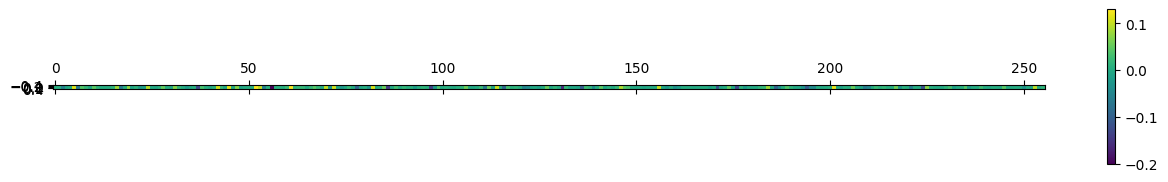

value weights with shape torch.Size([1, 256]) and rank 1.


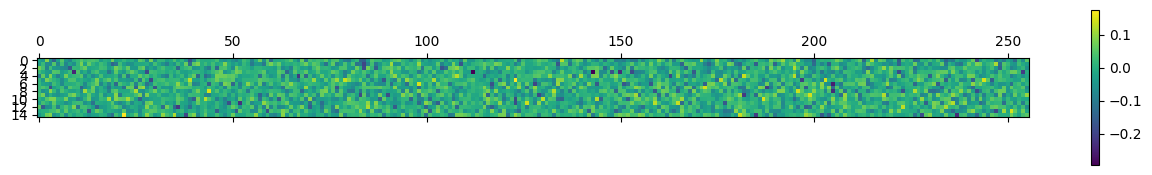

policy weights with shape torch.Size([15, 256]) and rank 15.


In [6]:
# Show weights for the network heads
for head in ('value', 'policy'):
    v = model_SD[f'fc_{head}.weight']
    rank = t.linalg.matrix_rank(v)
    plt.matshow(v)
    plt.colorbar()
    plt.show()
    print(f'{head} weights with shape {v.shape} and rank {rank}.')

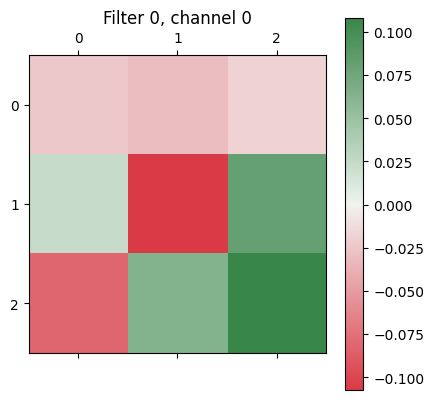

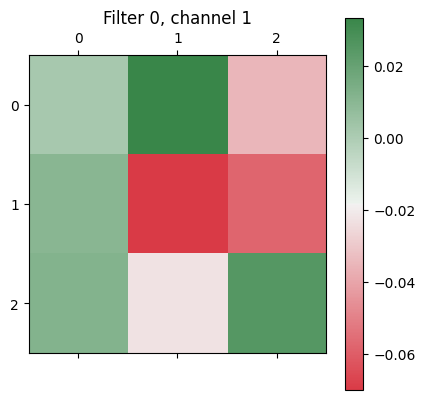

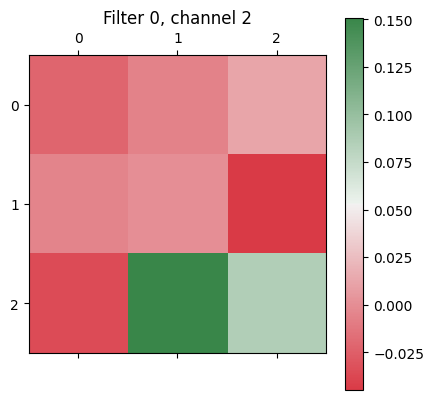

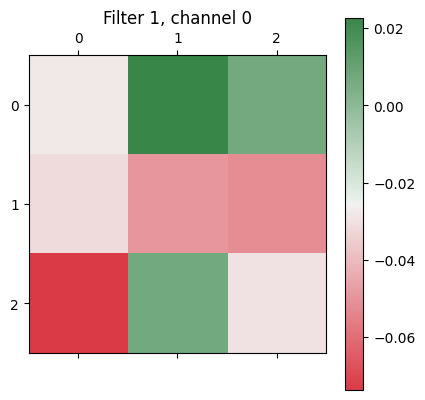

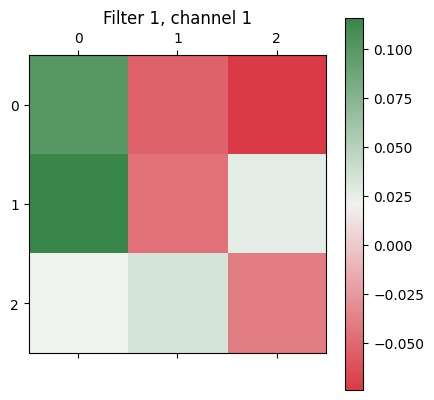

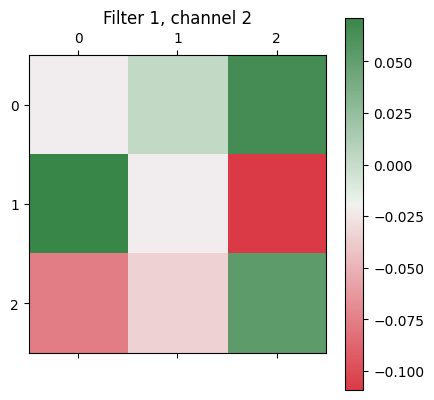

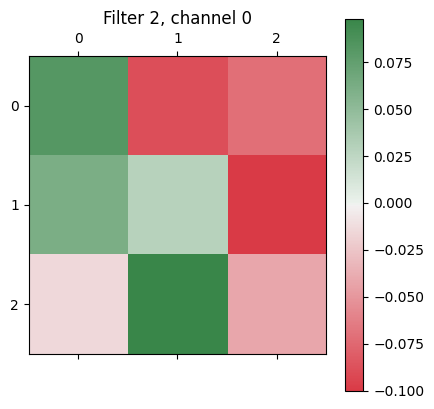

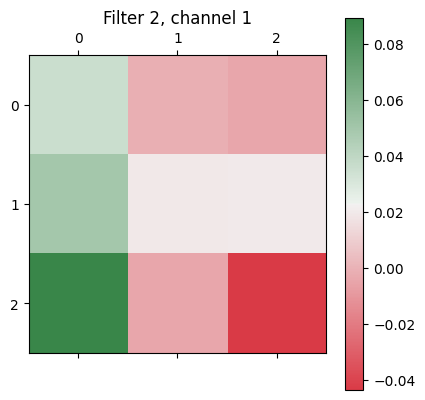

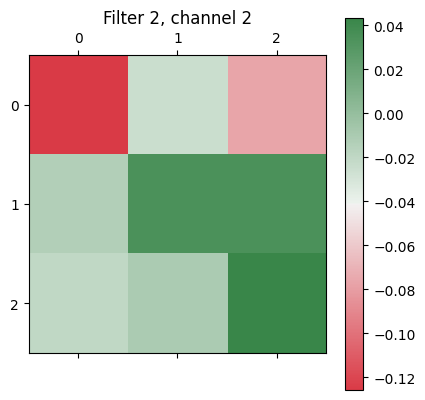

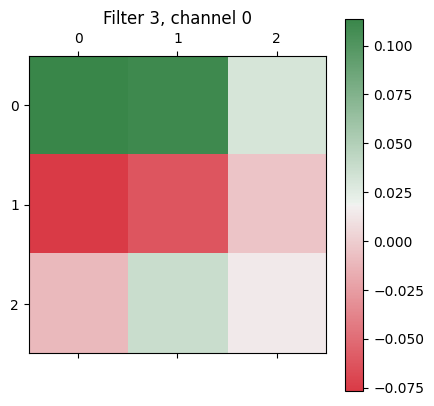

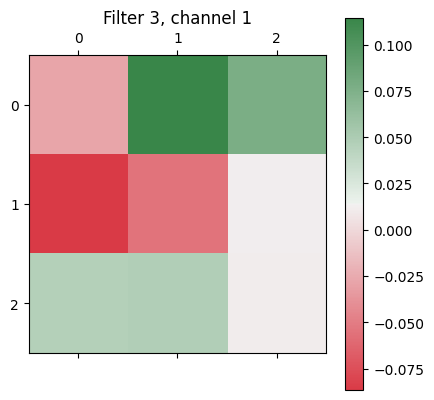

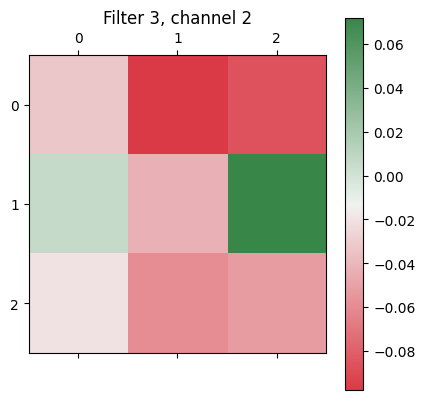

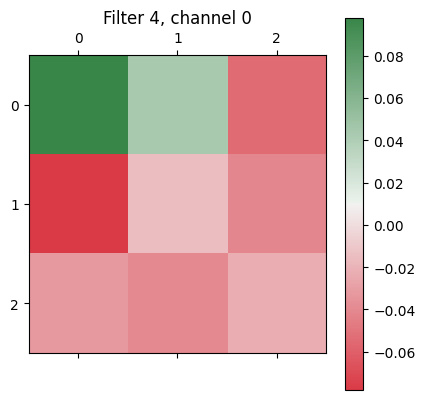

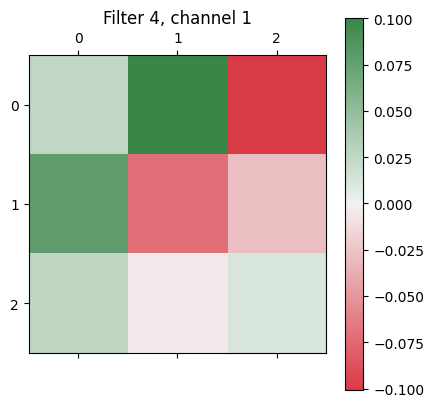

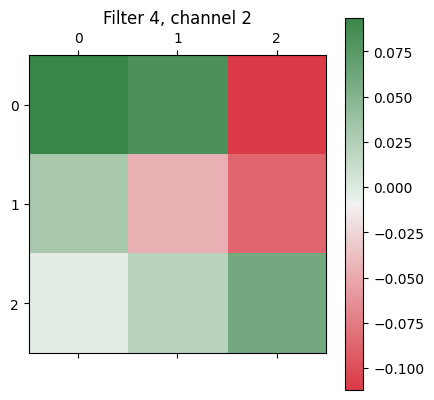

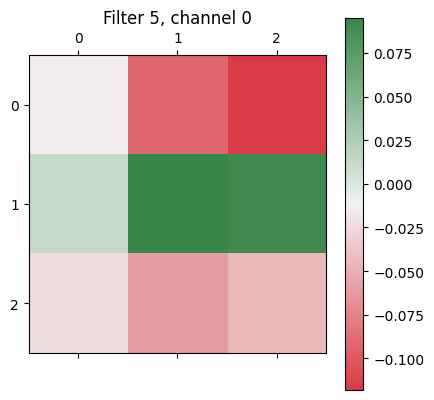

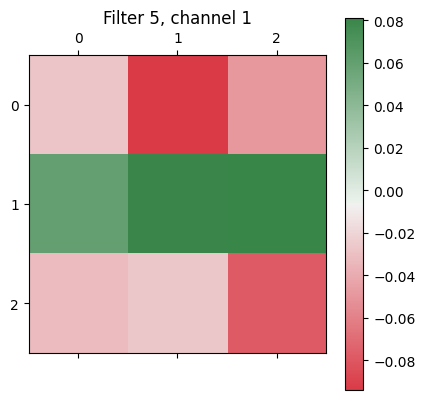

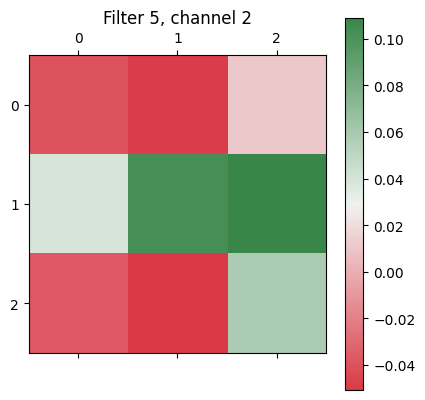

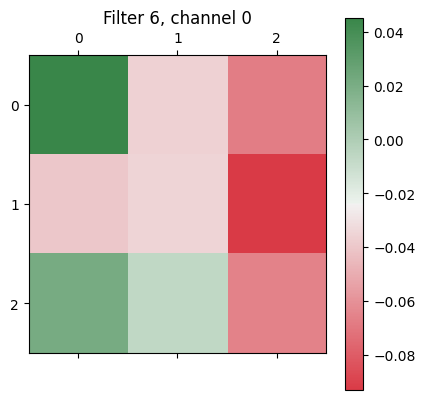

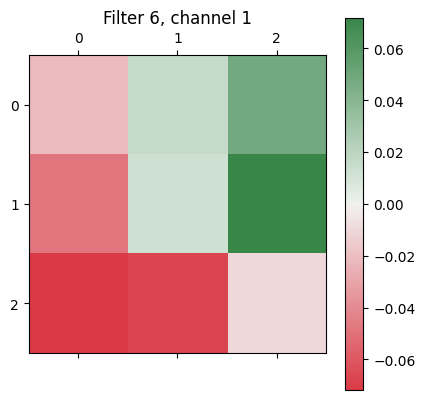

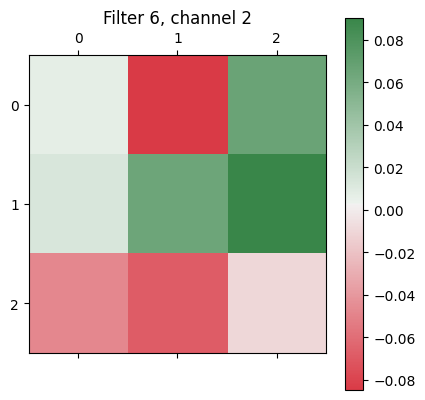

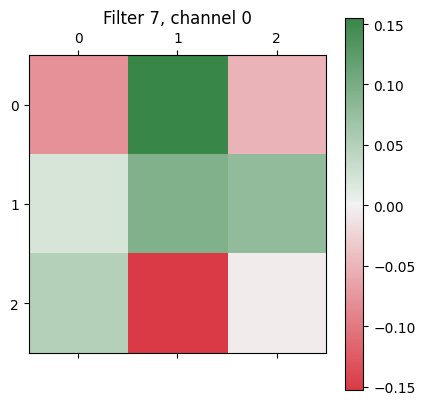

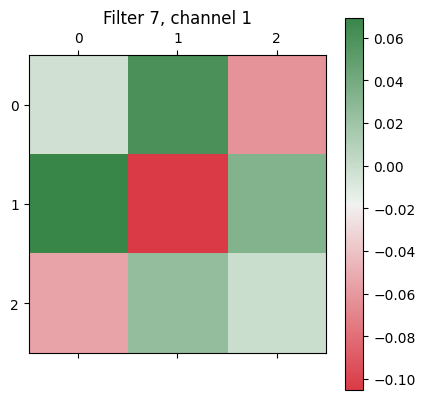

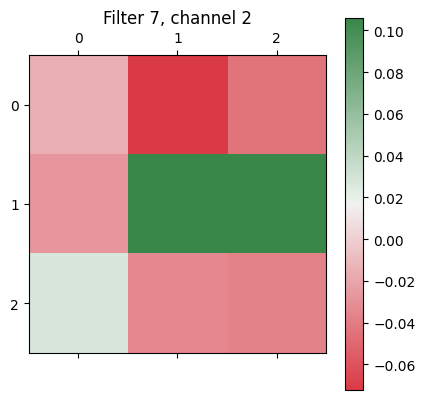

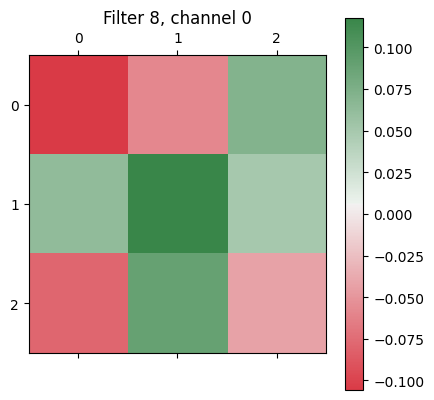

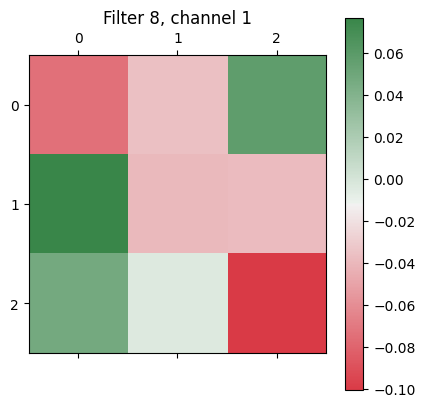

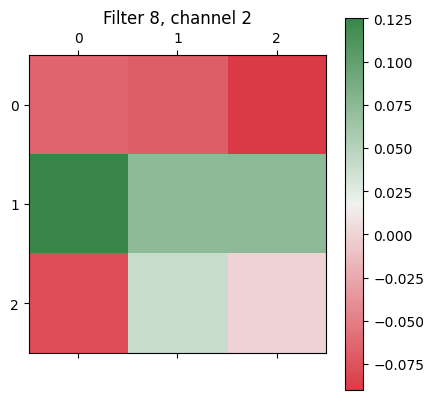

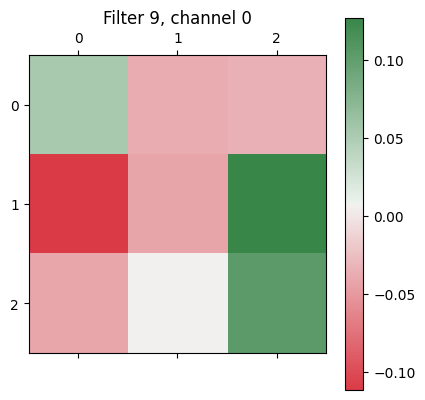

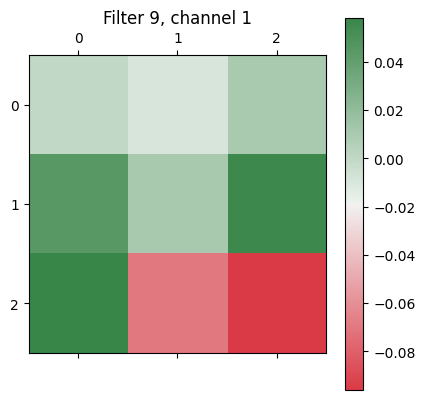

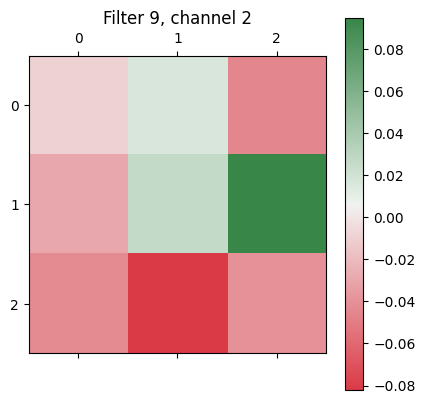

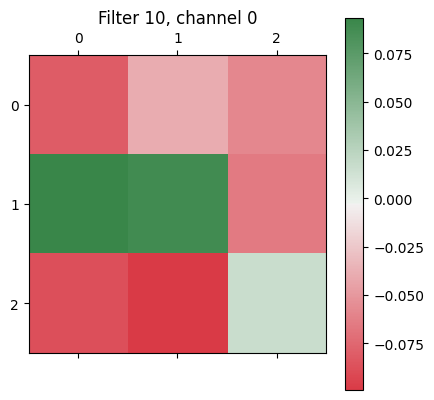

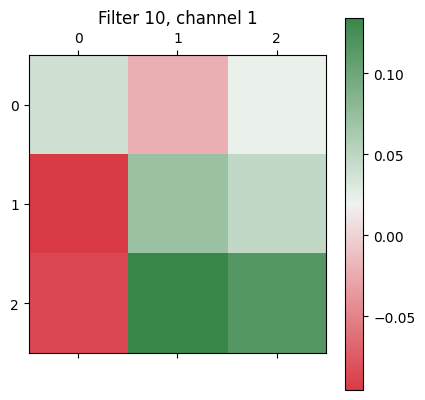

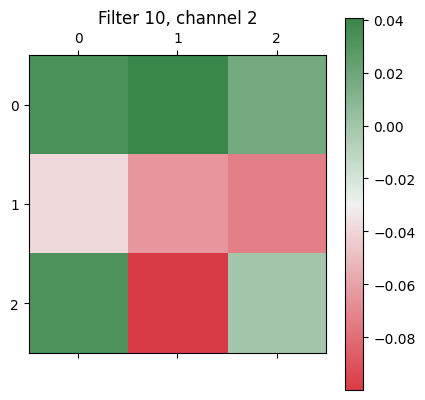

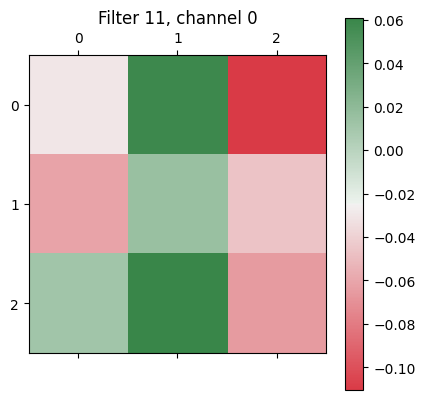

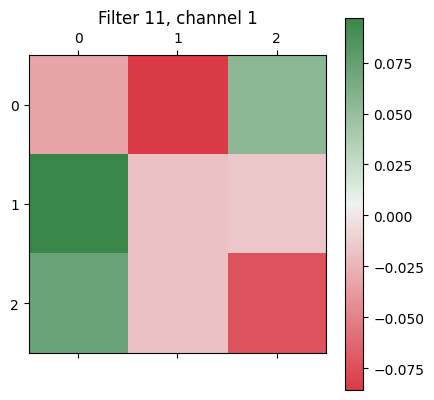

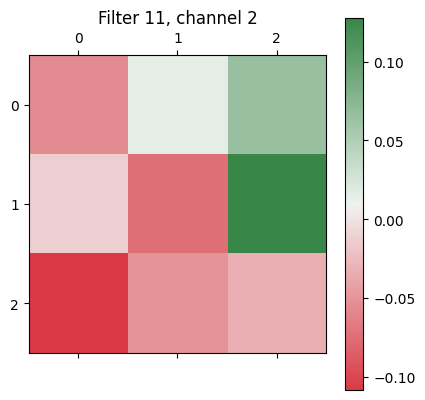

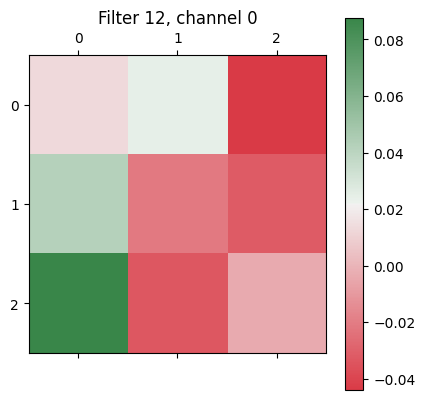

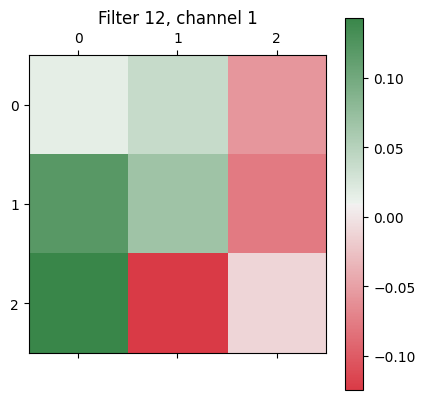

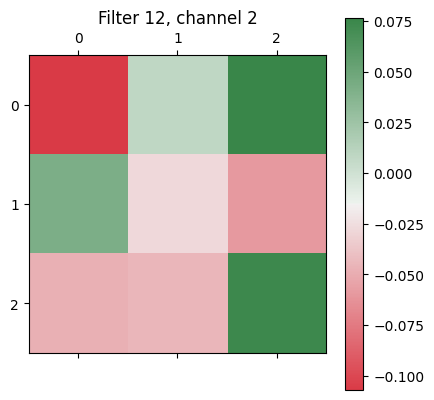

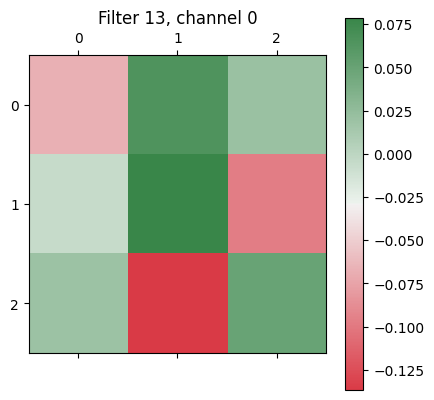

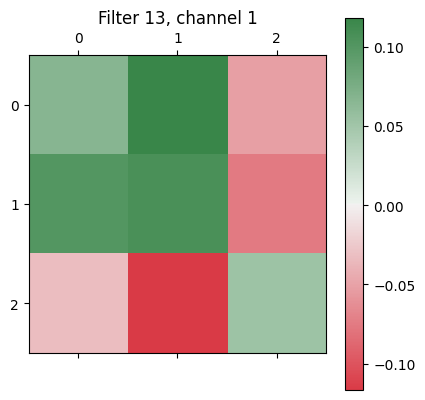

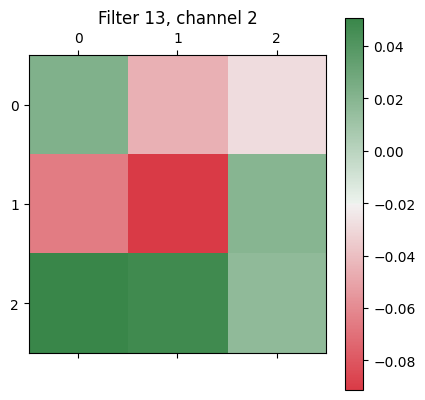

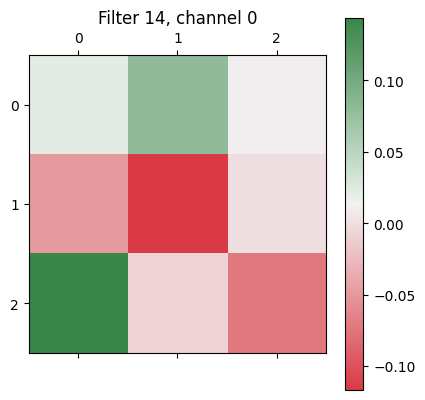

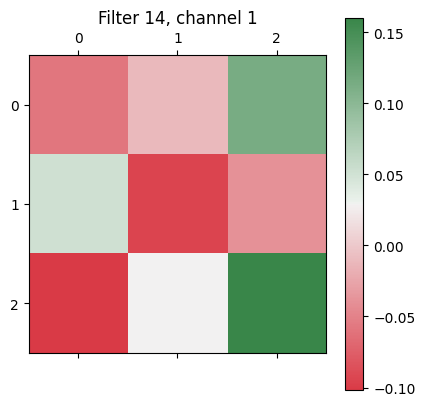

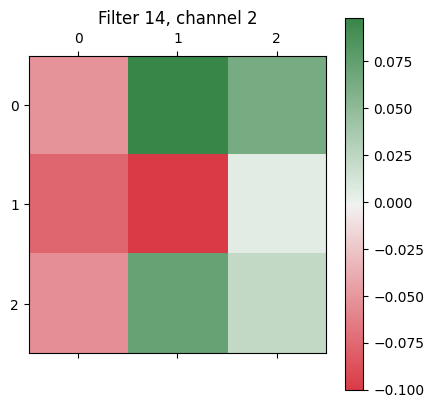

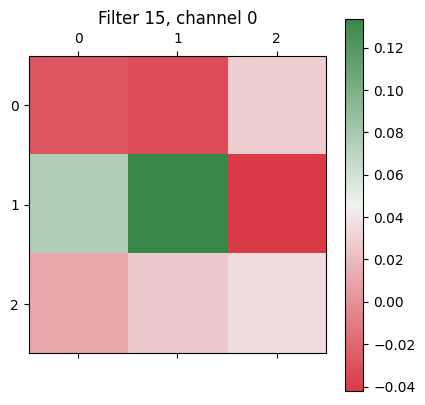

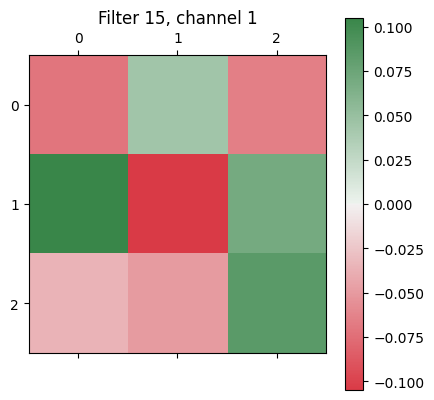

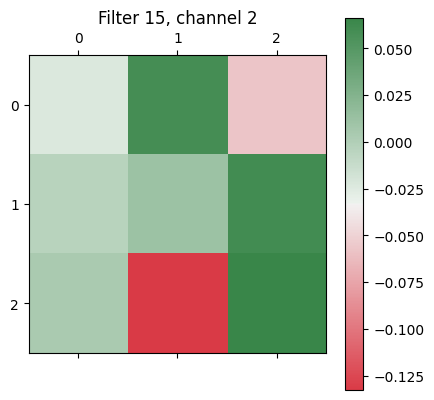

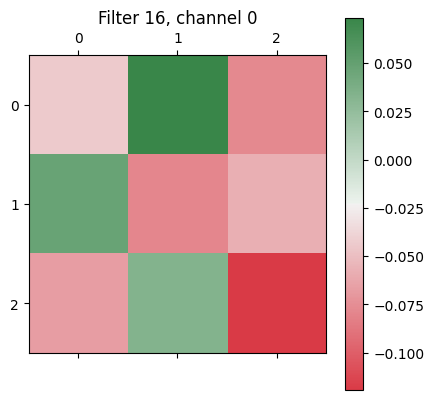

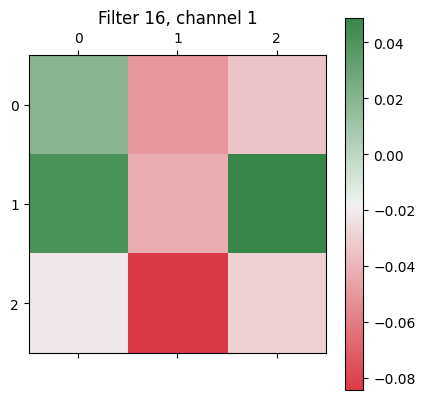

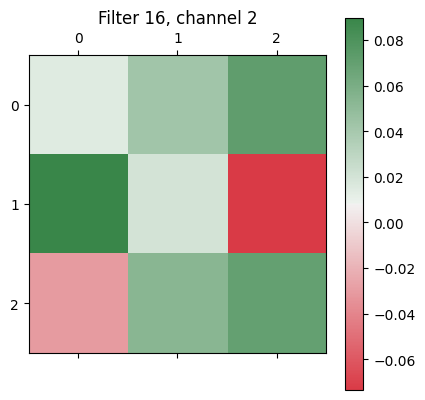

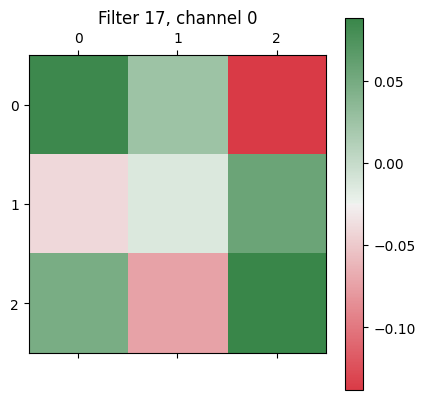

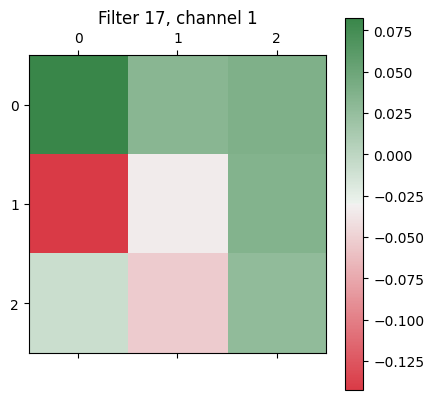

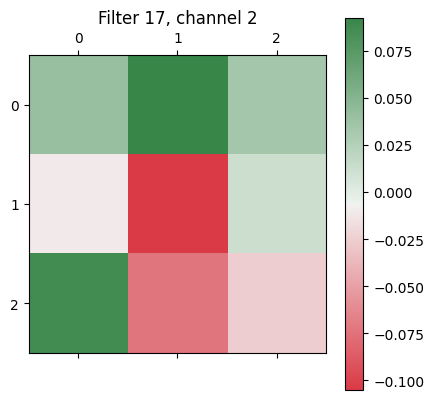

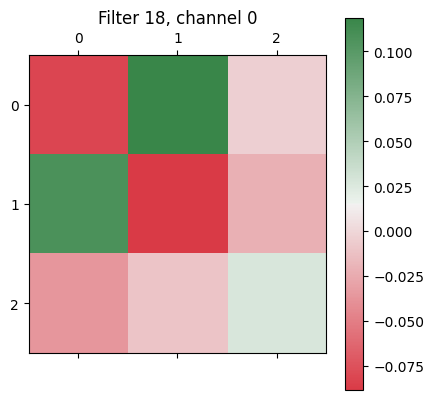

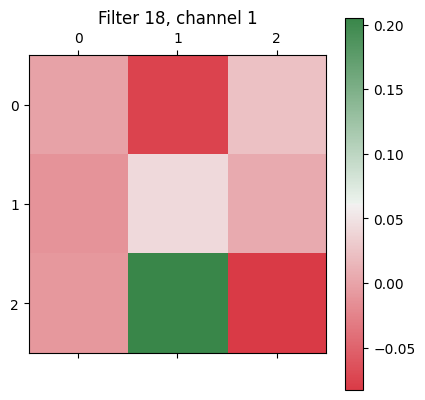

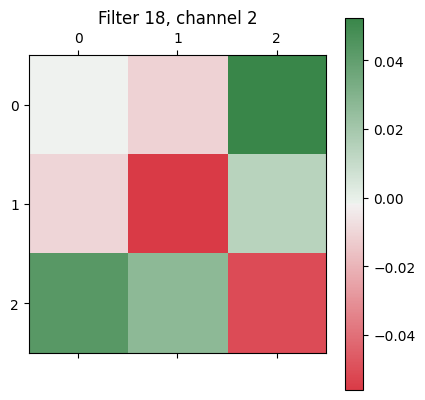

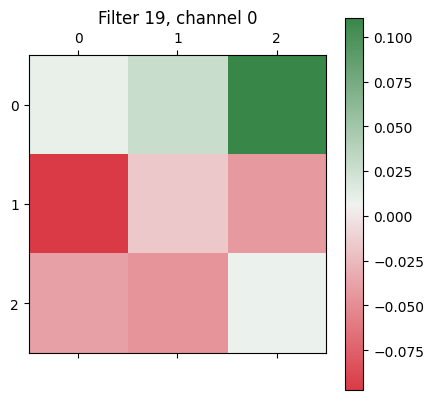

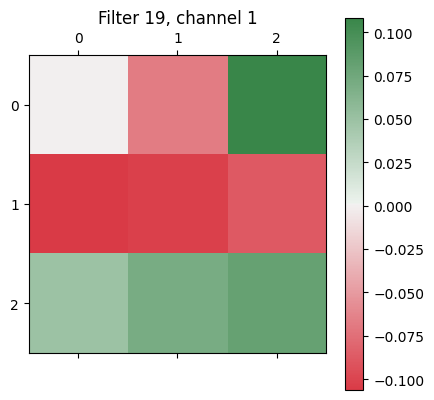

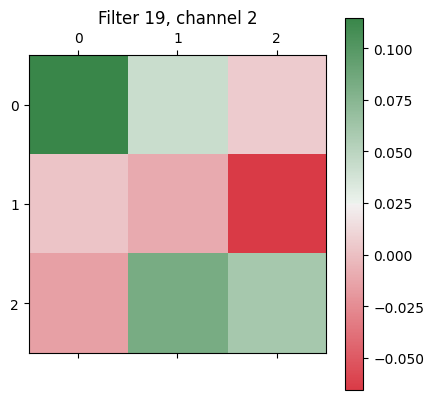

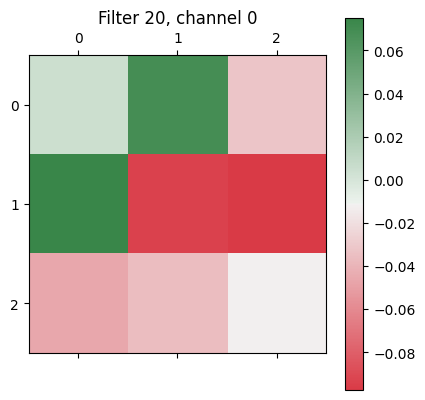

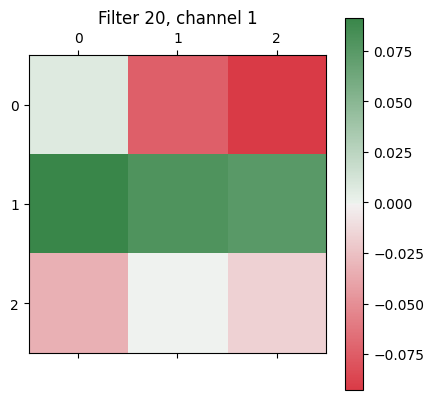

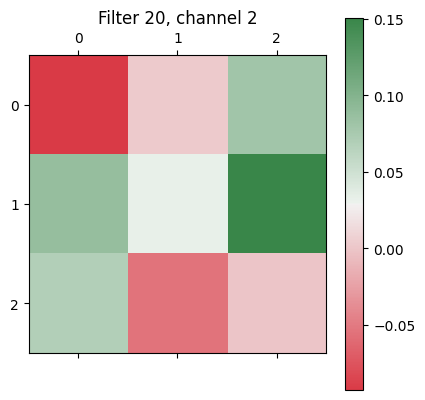

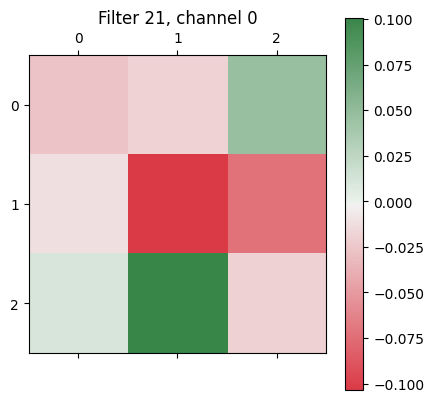

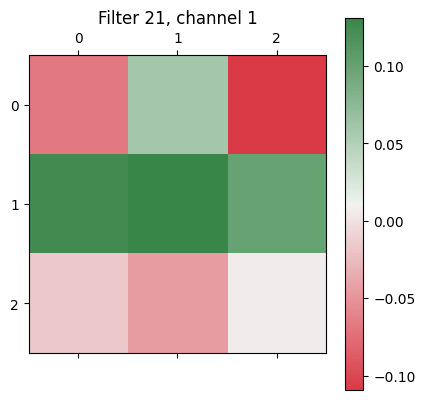

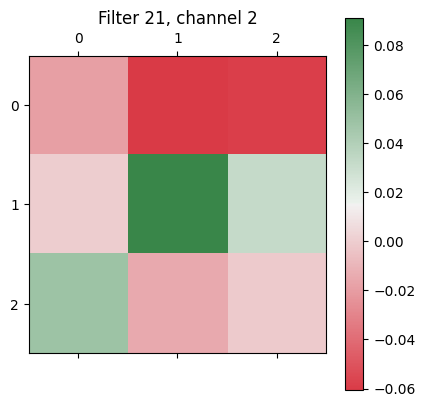

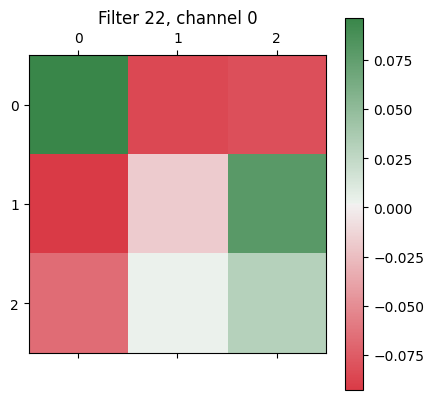

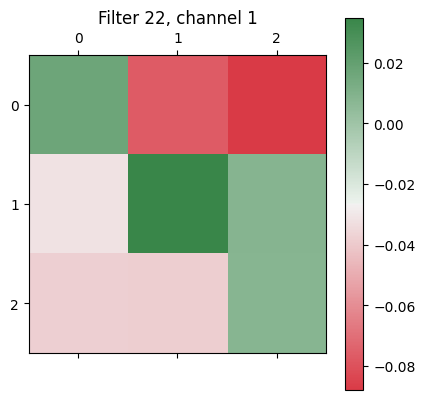

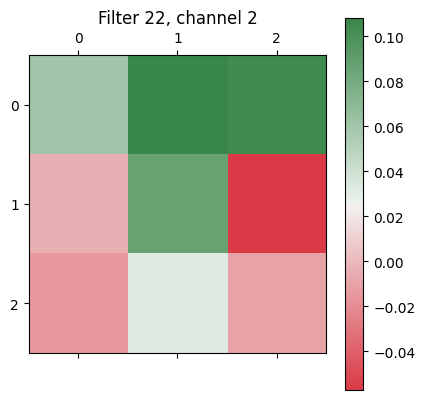

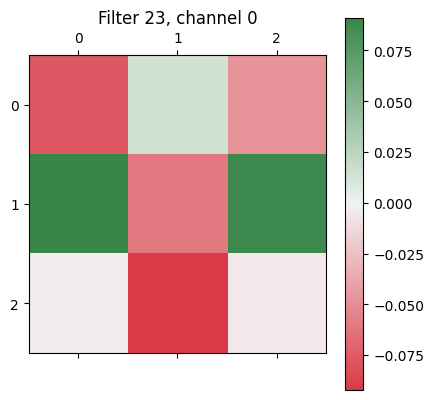

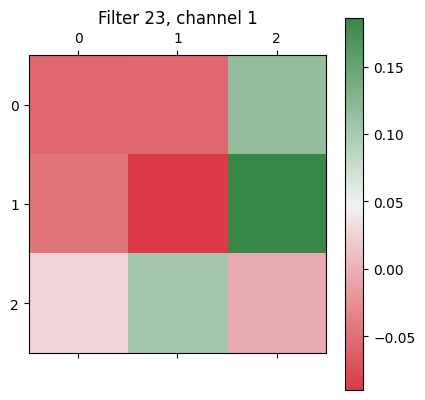

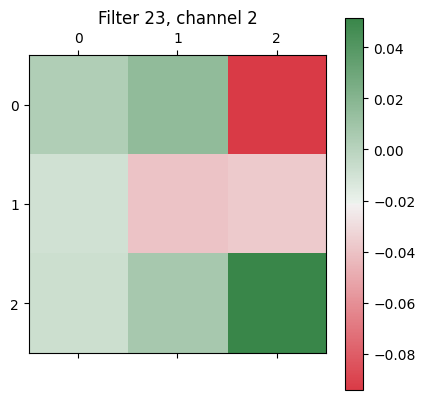

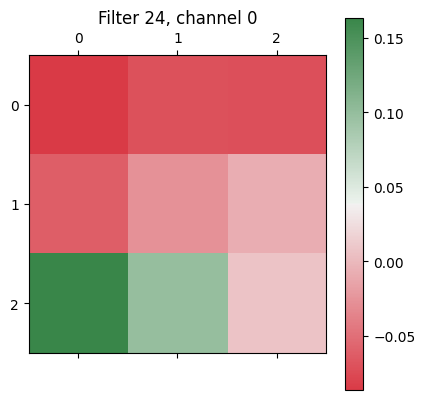

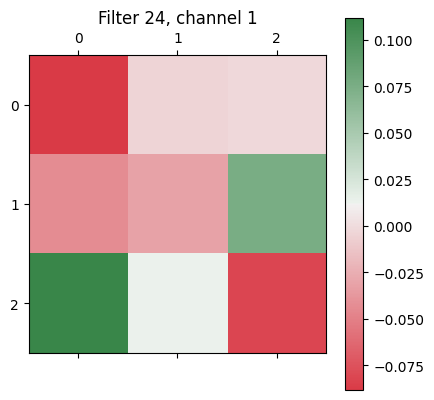

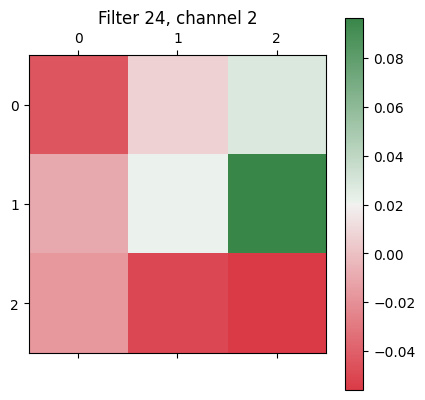

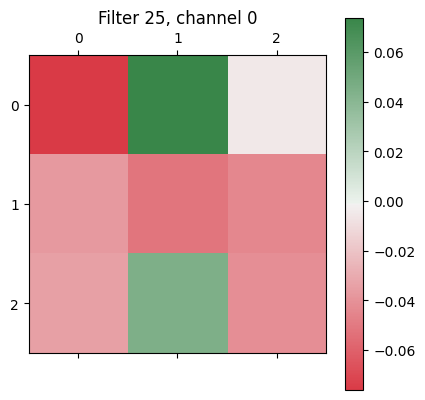

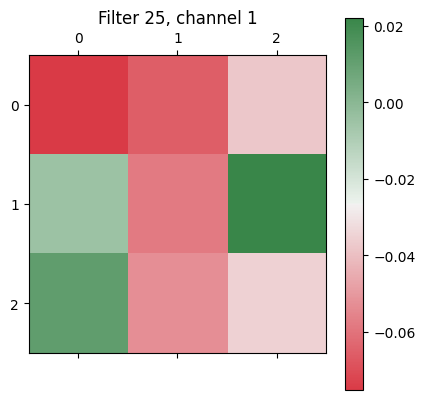

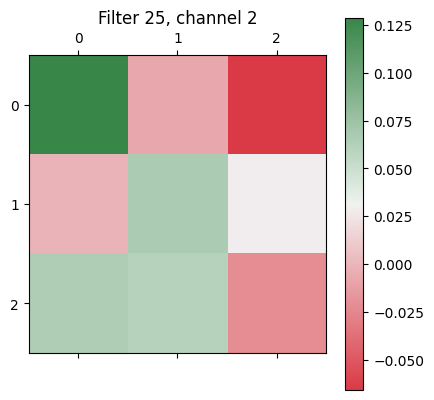

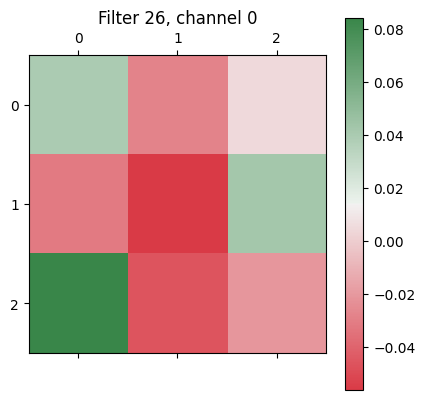

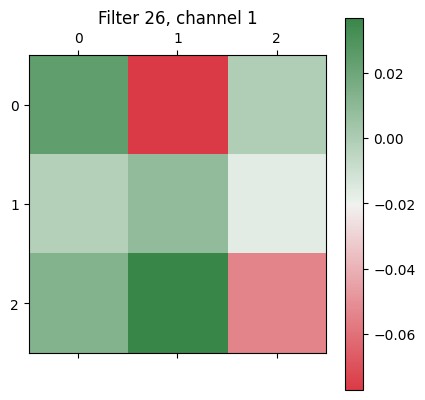

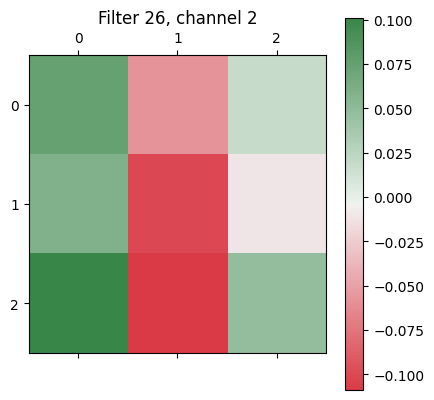

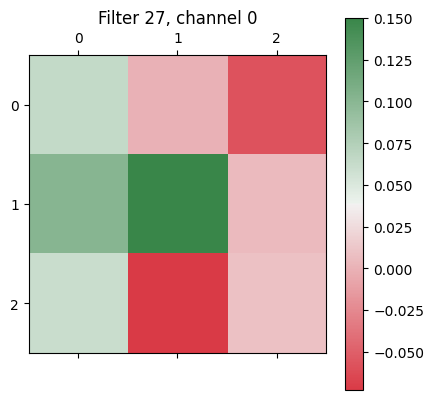

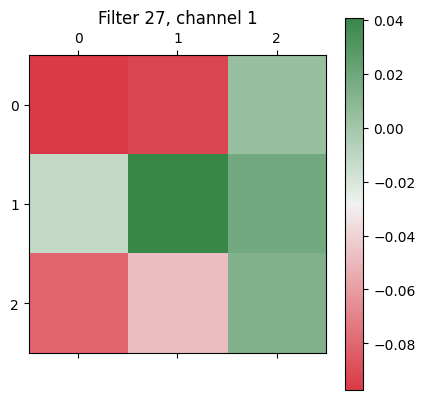

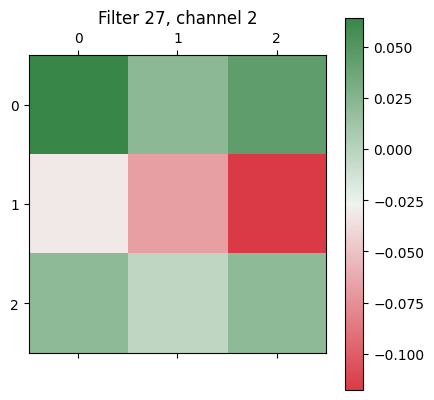

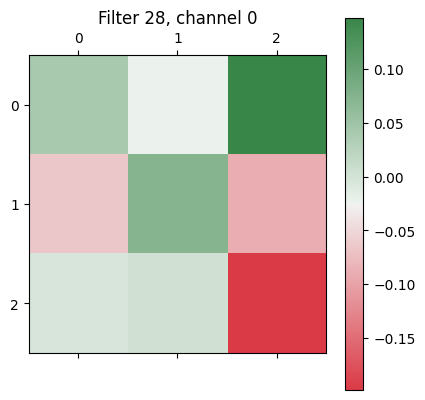

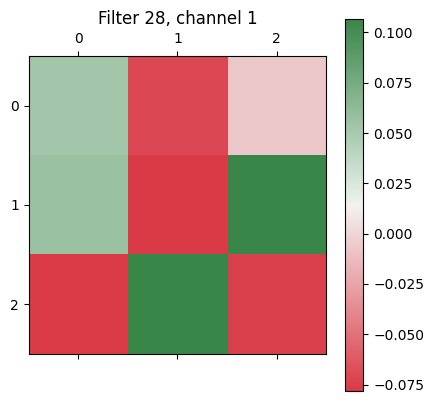

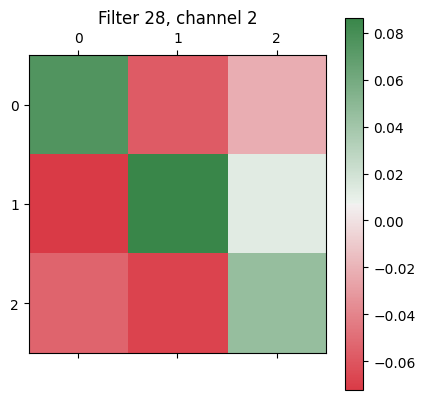

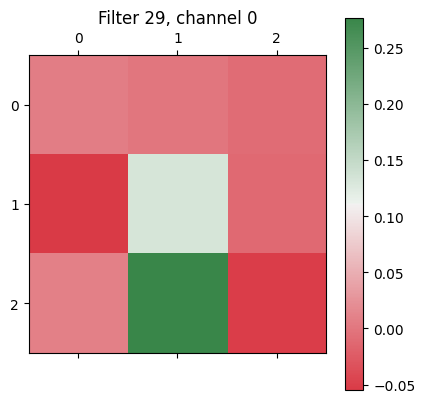

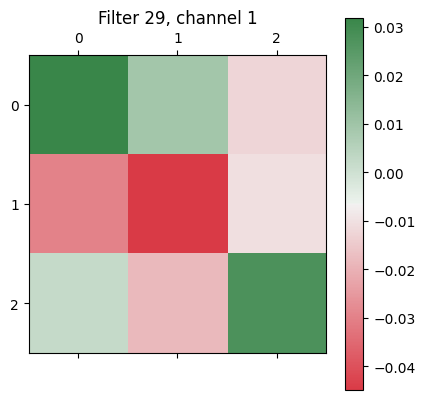

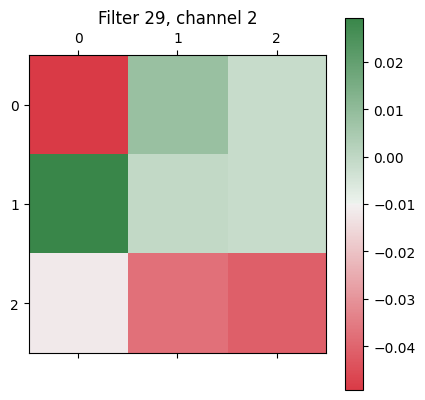

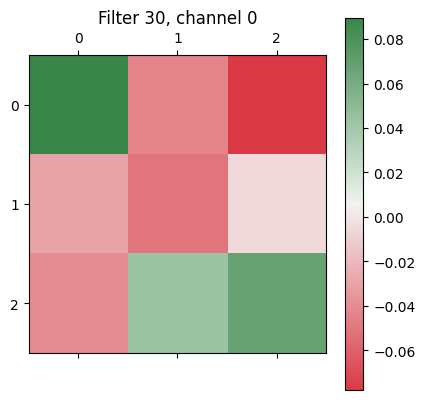

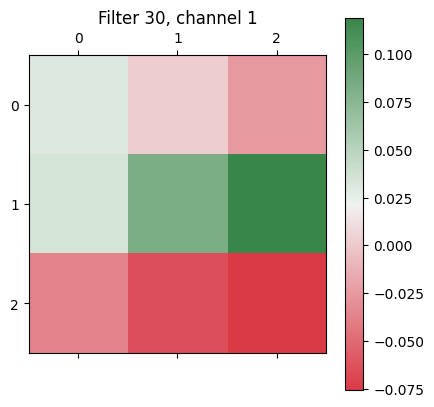

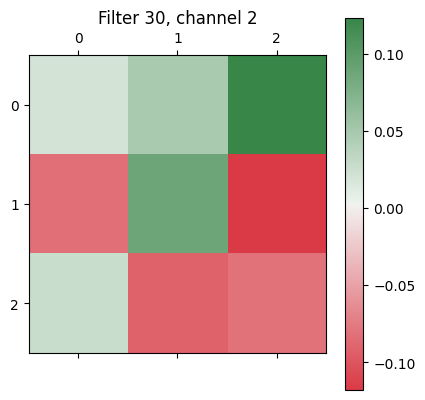

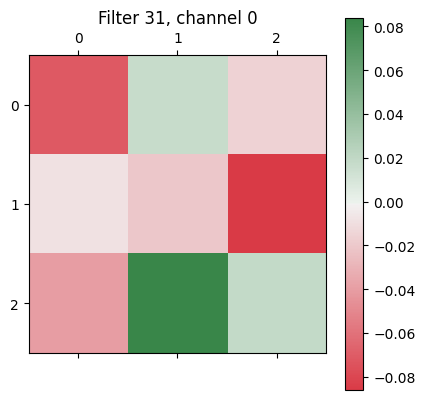

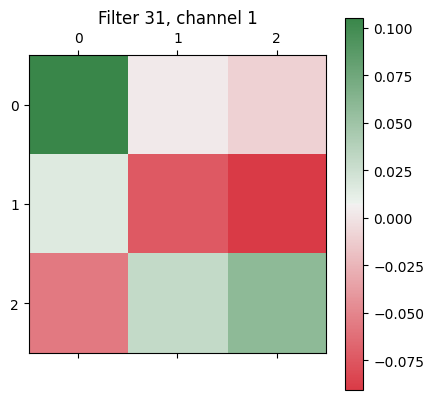

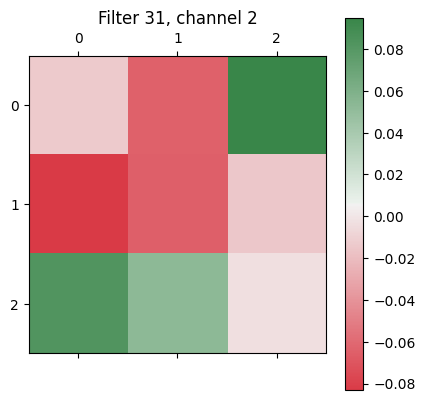

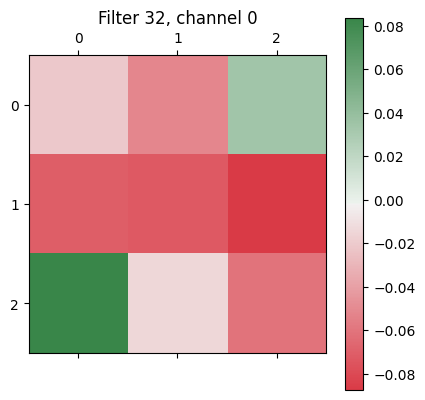

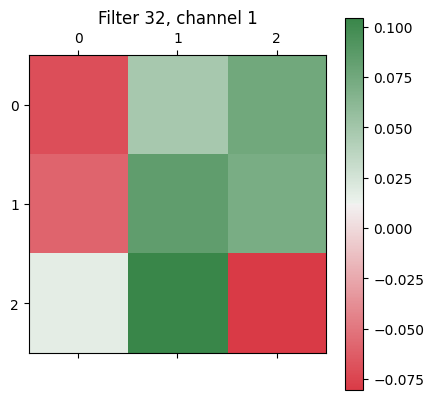

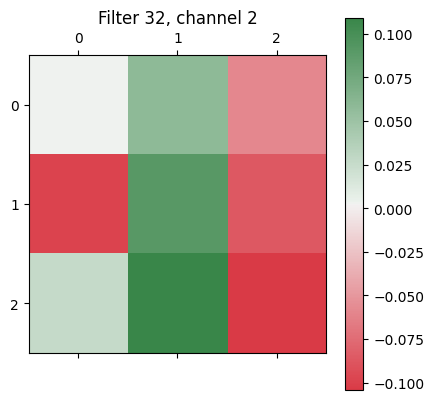

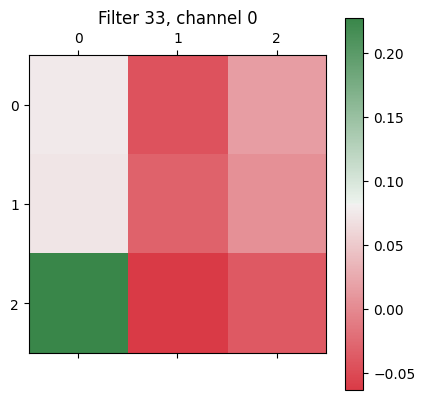

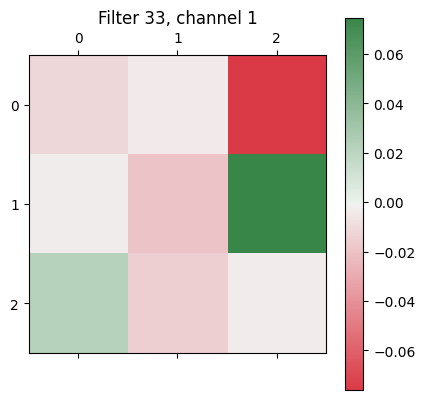

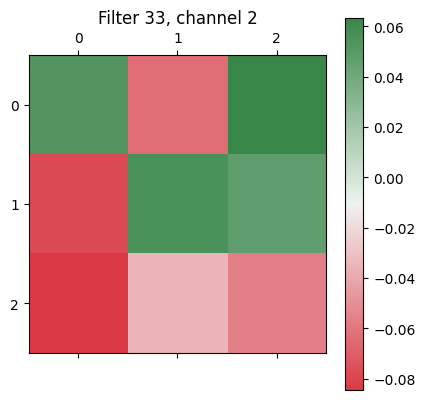

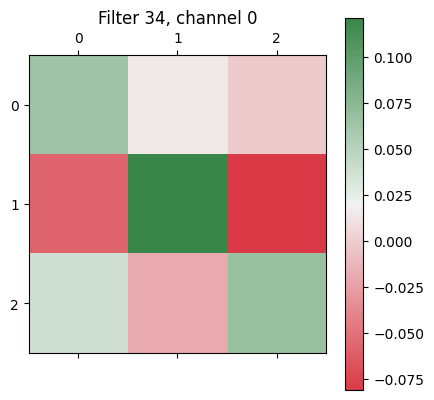

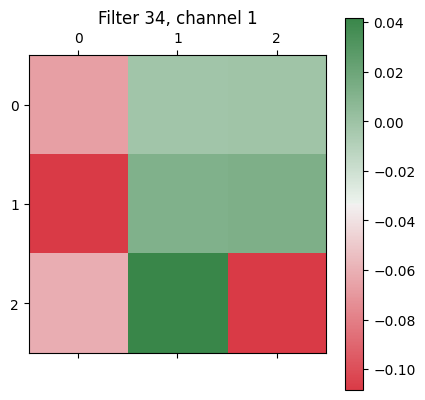

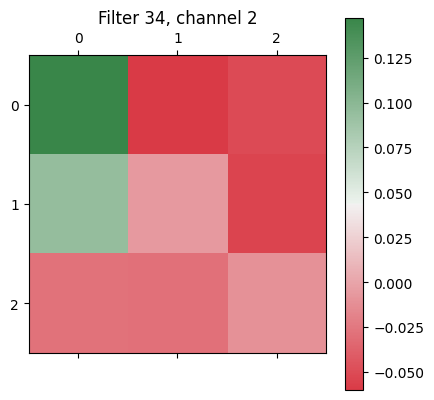

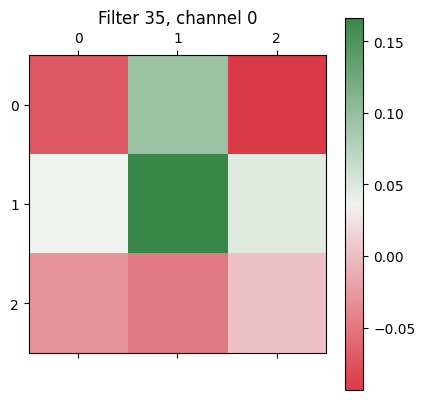

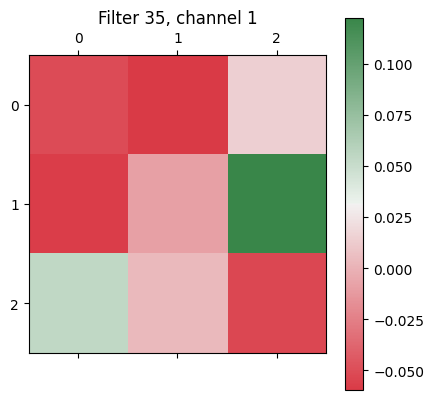

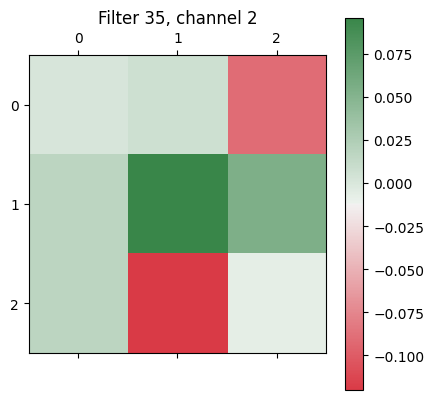

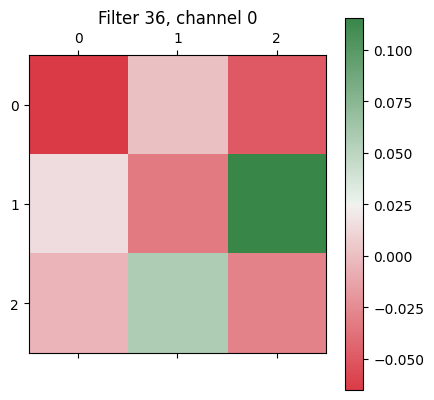

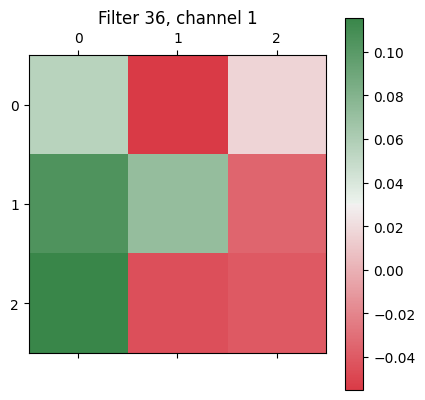

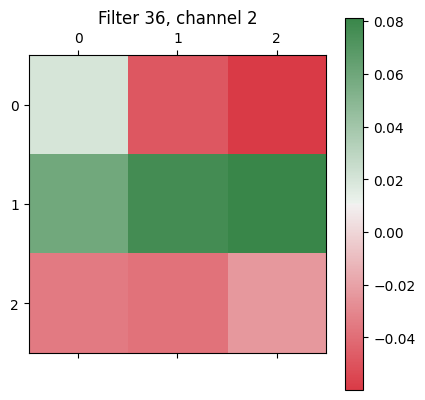

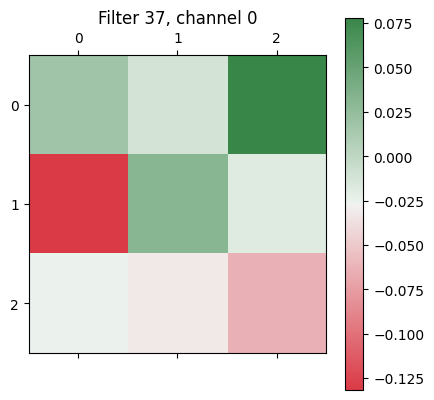

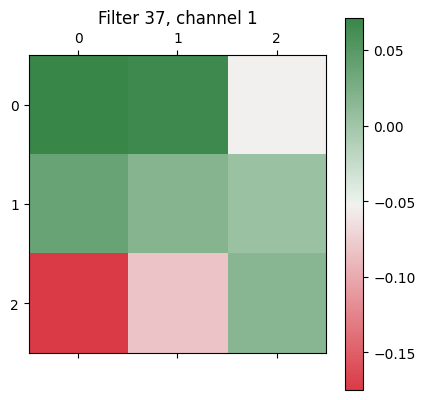

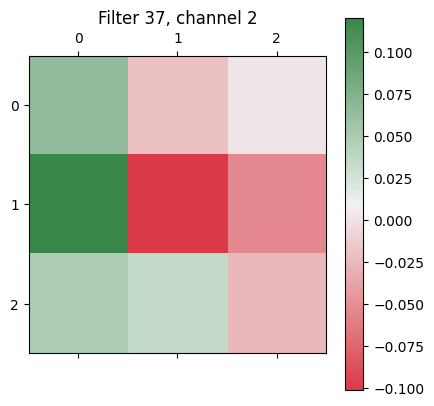

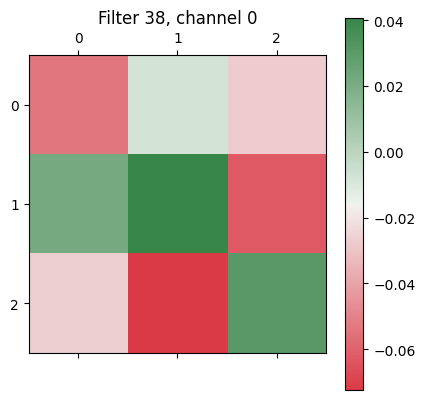

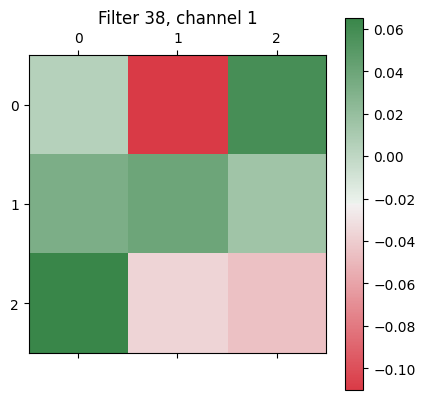

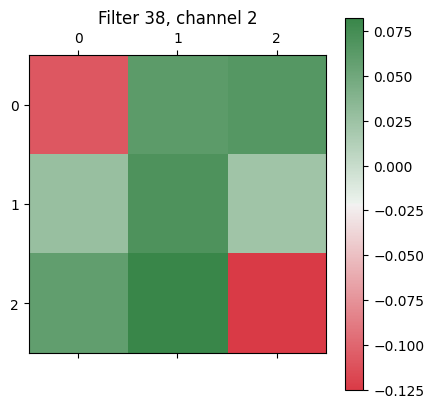

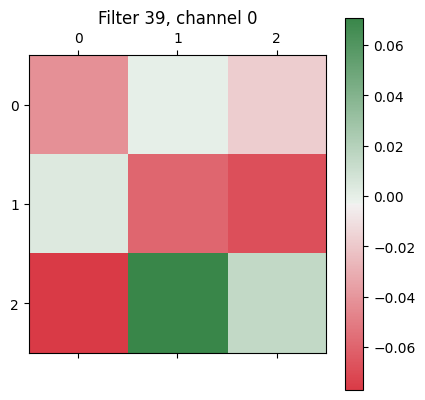

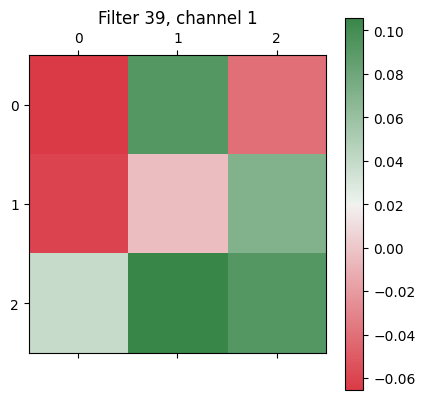

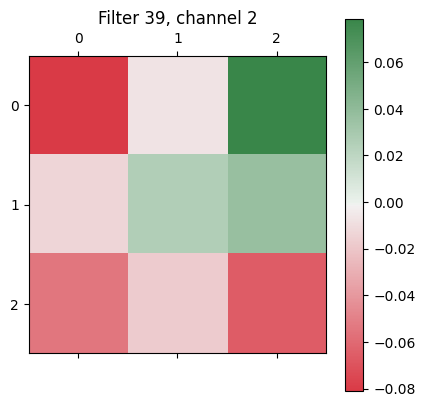

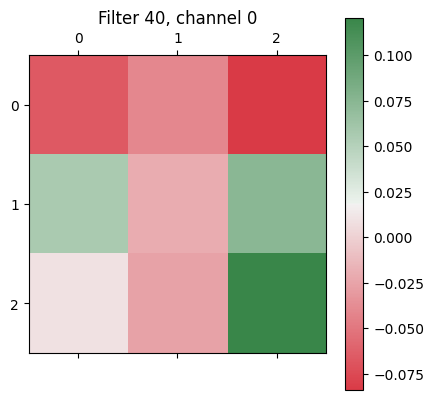

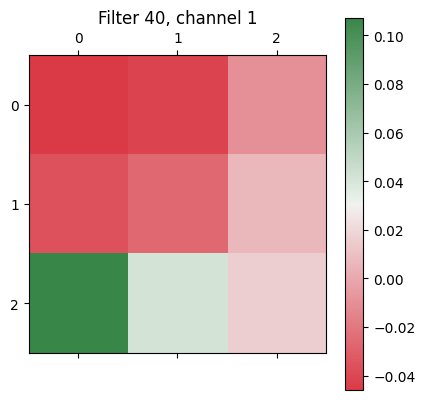

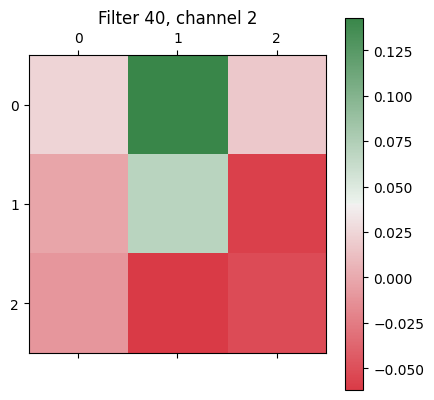

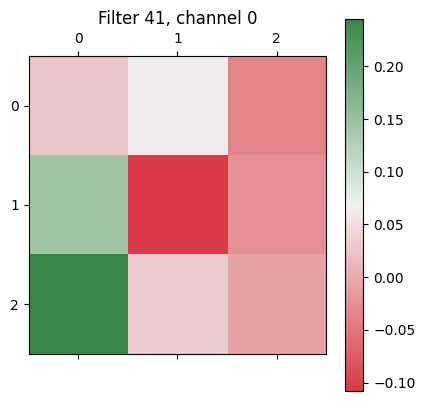

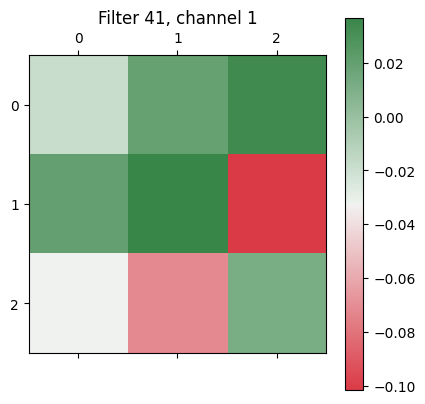

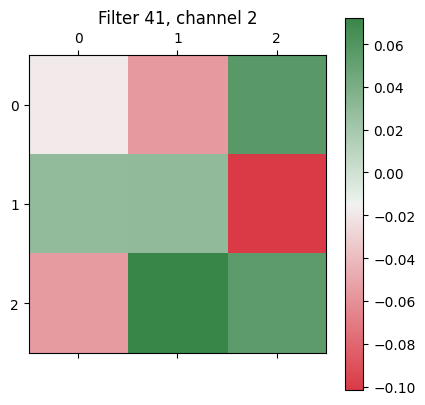

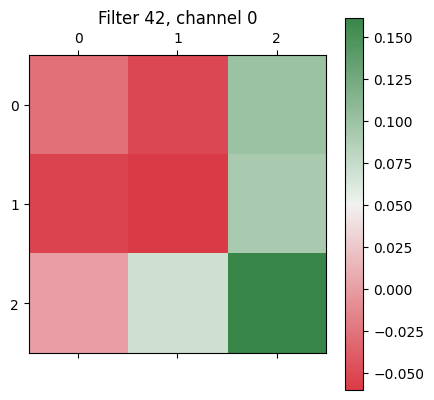

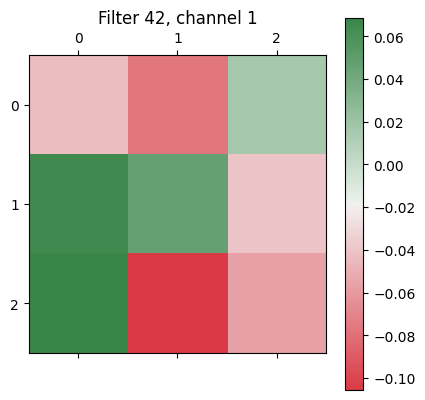

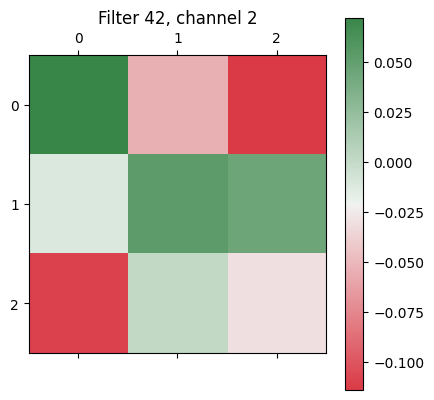

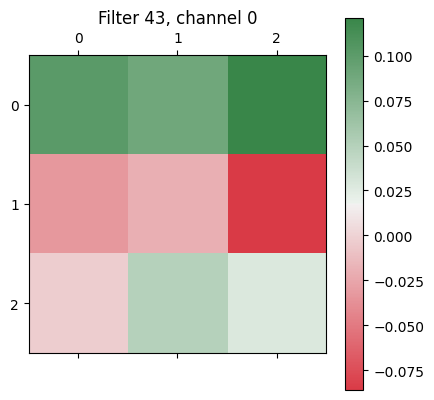

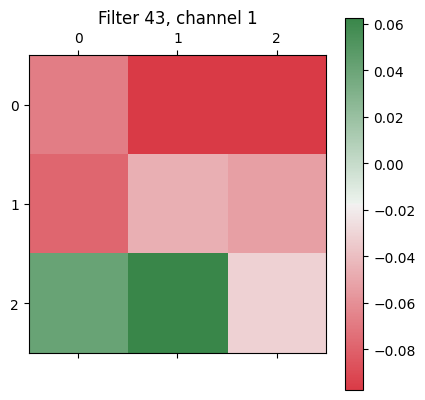

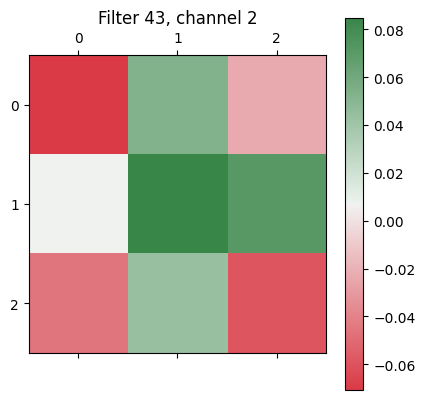

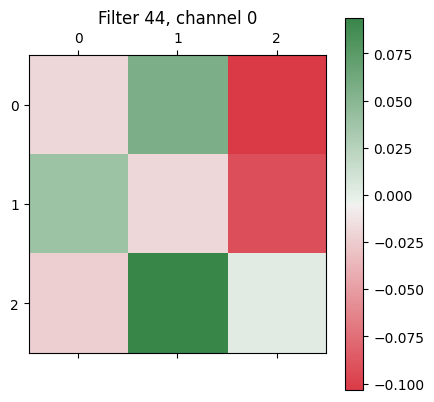

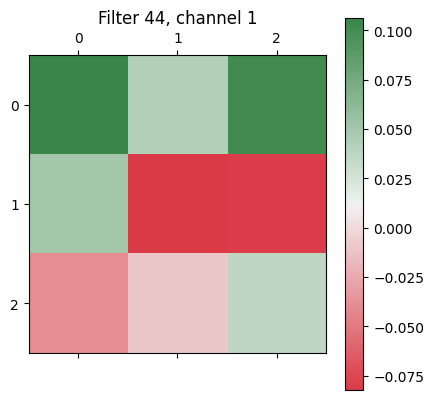

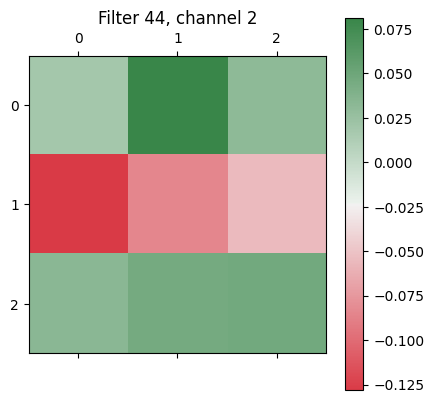

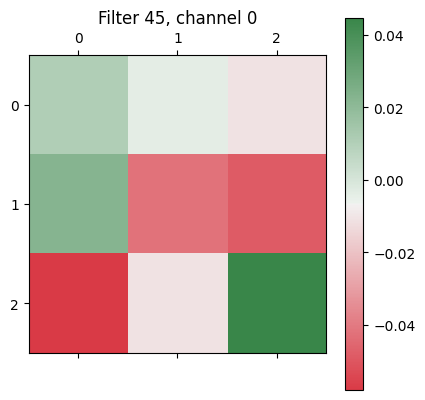

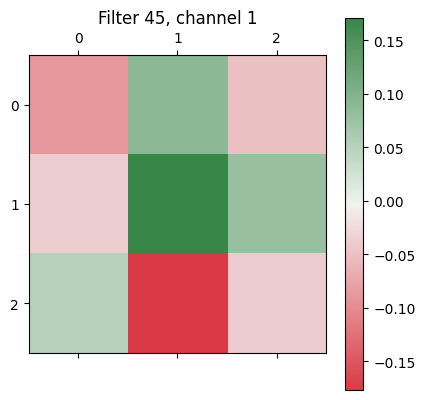

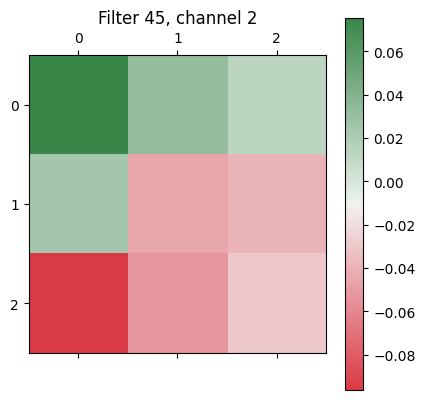

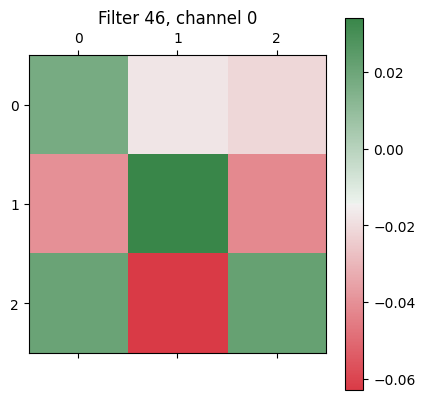

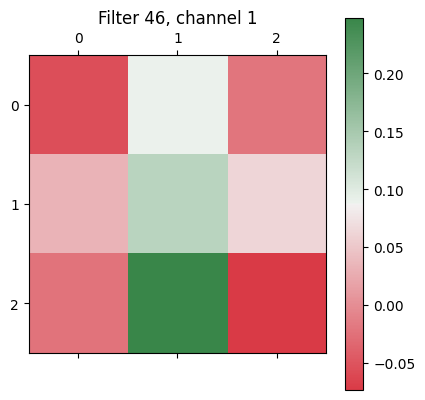

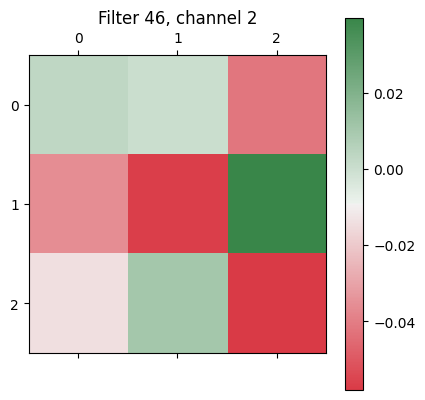

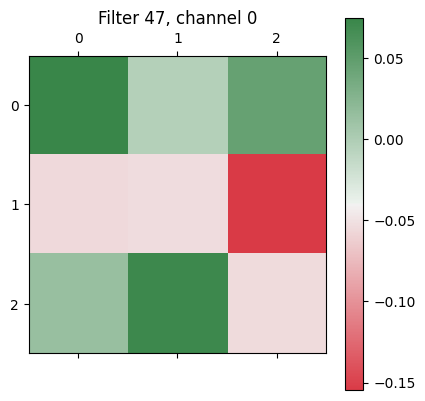

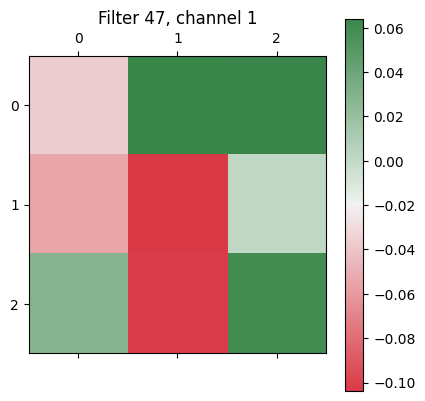

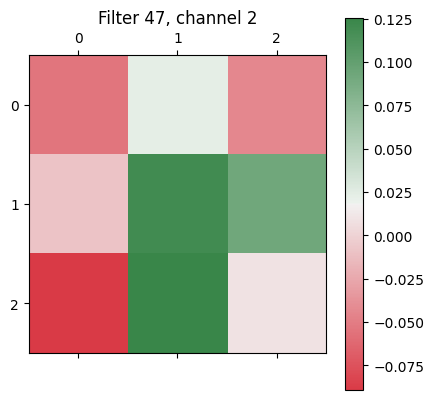

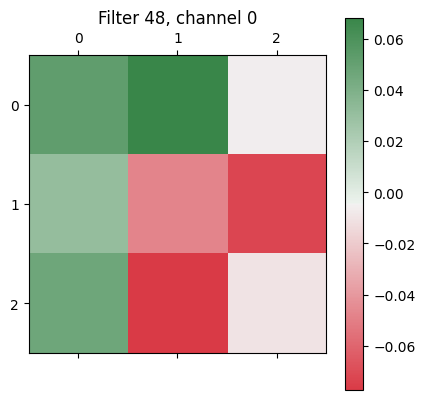

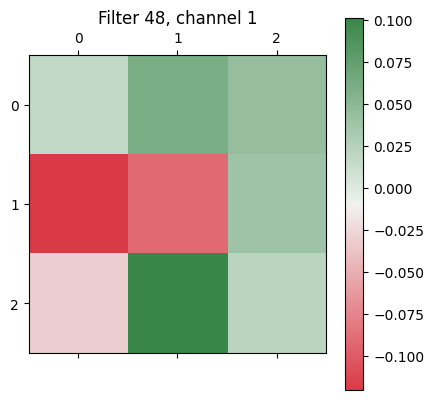

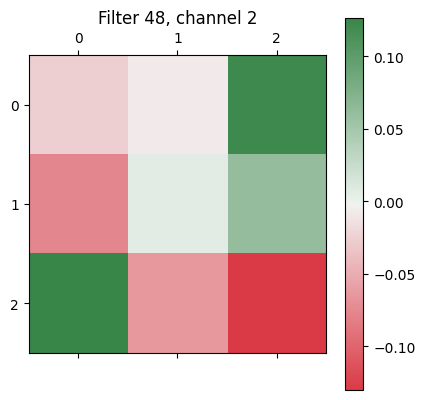

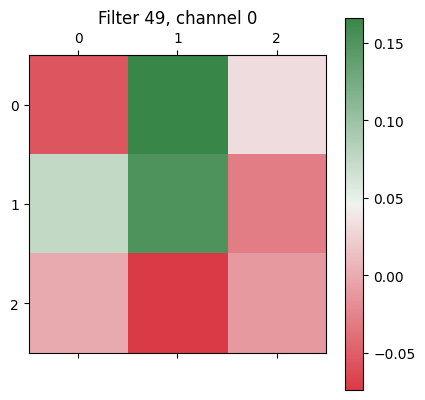

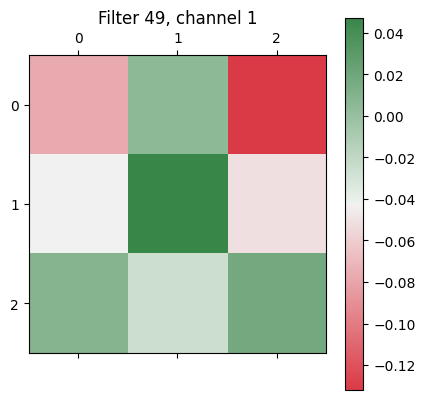

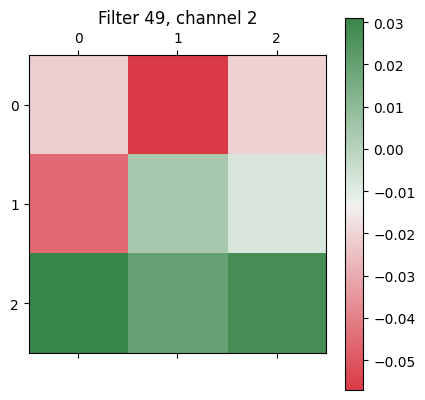

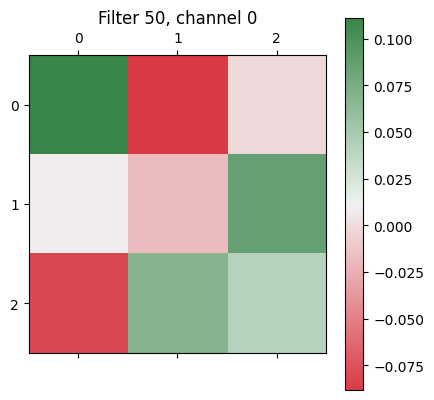

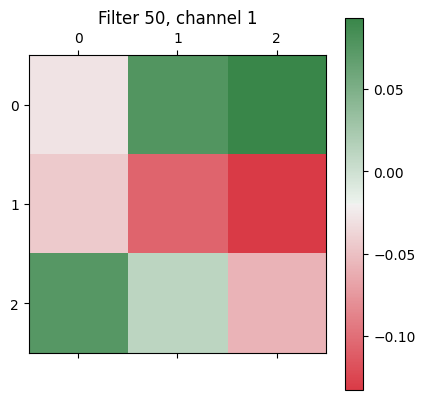

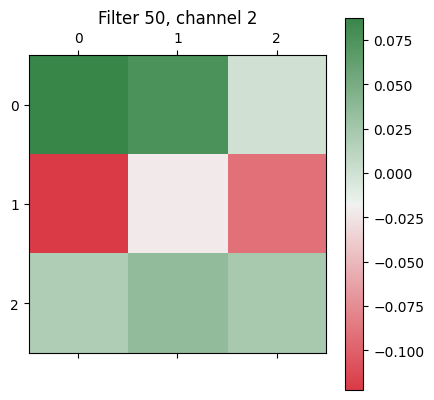

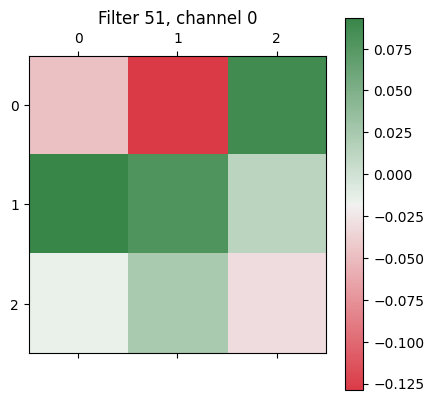

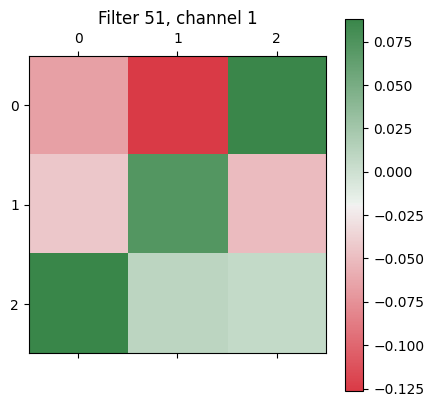

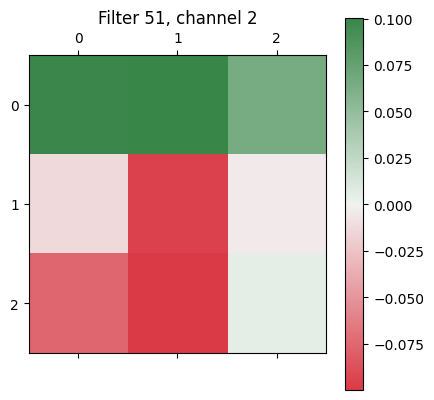

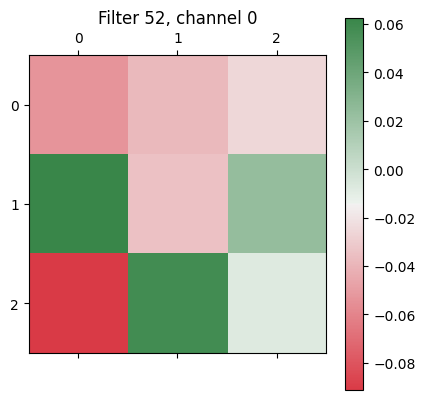

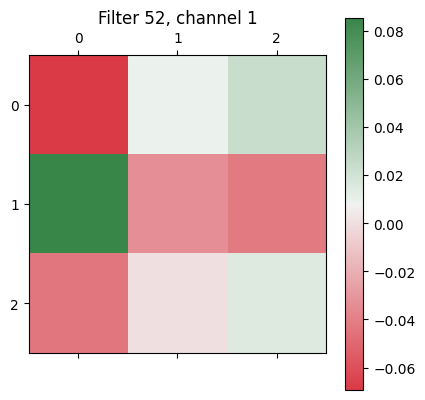

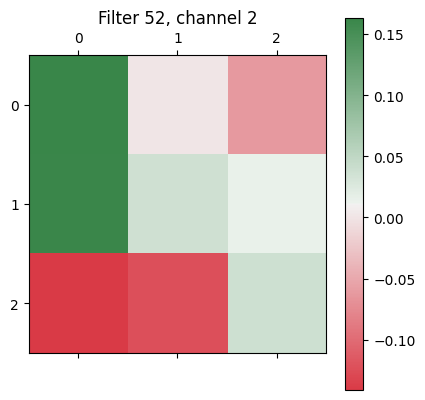

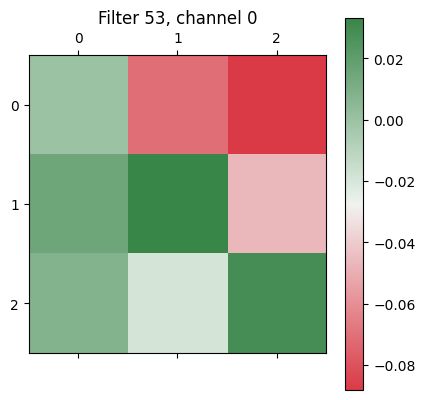

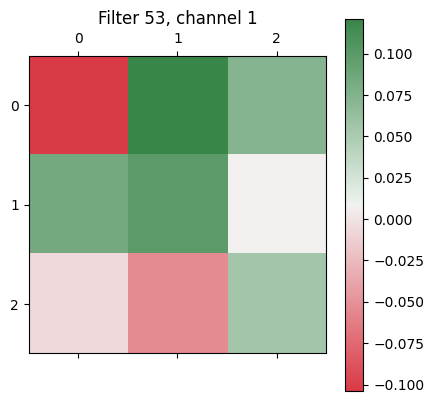

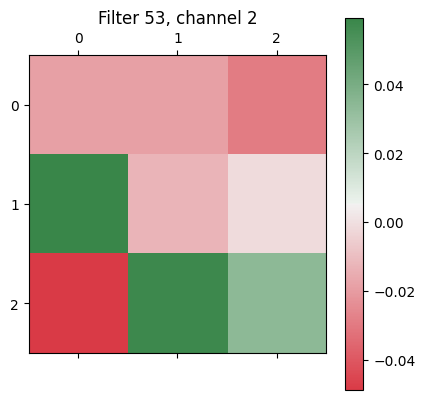

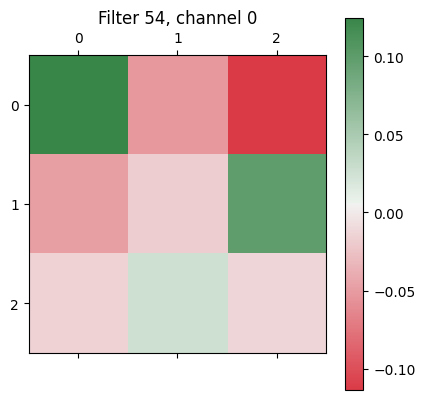

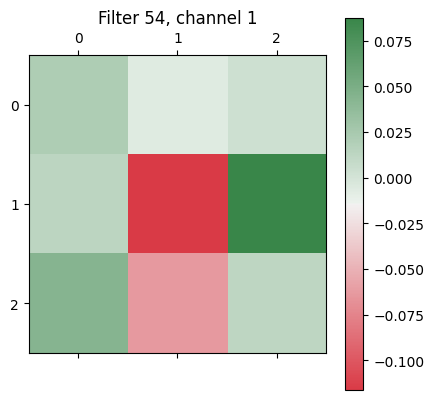

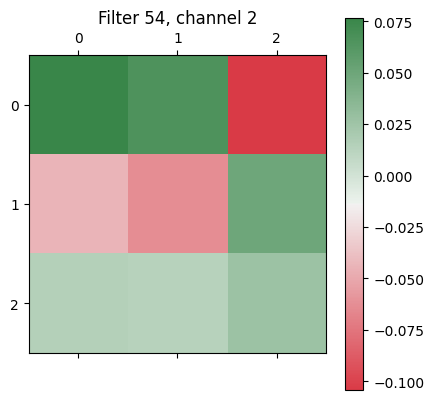

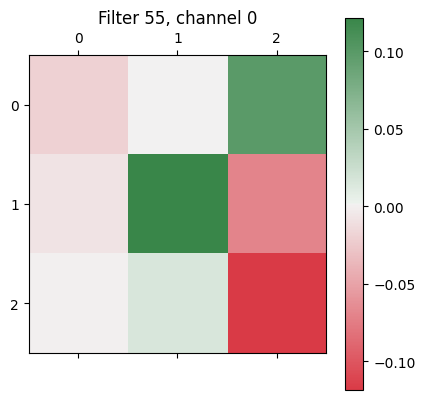

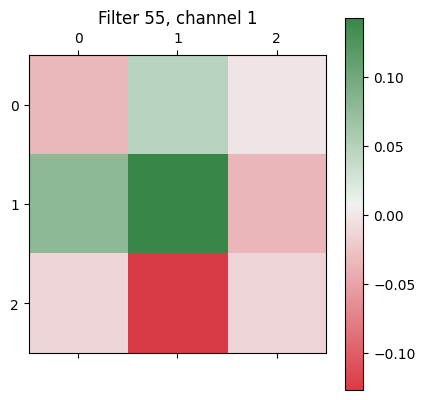

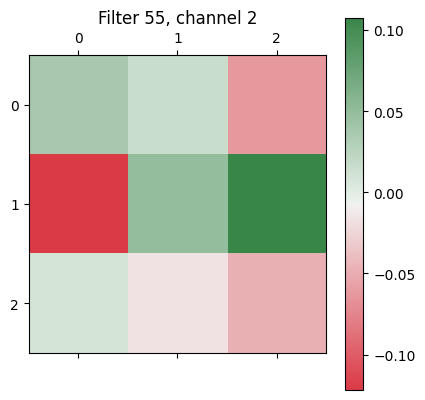

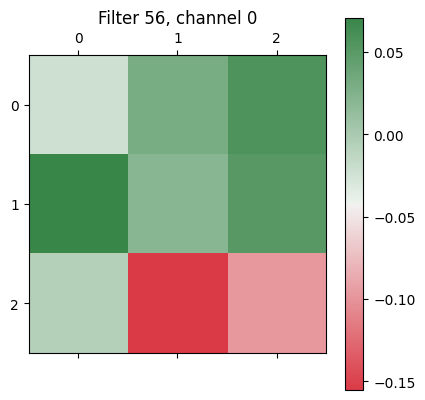

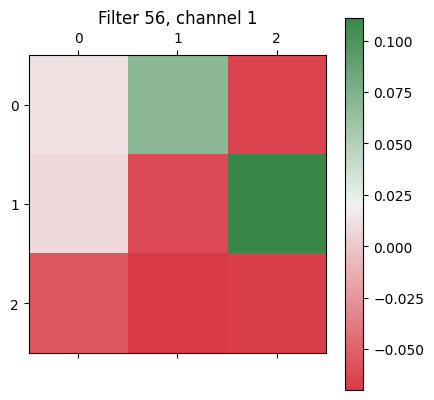

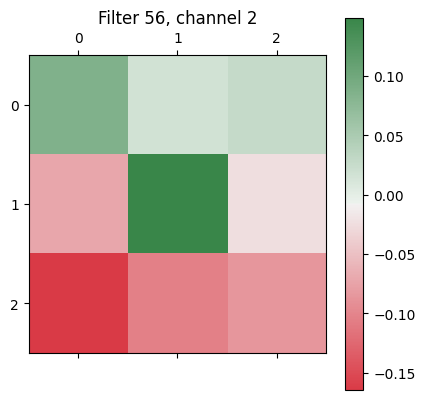

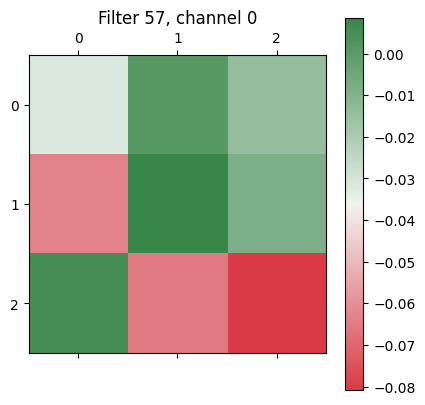

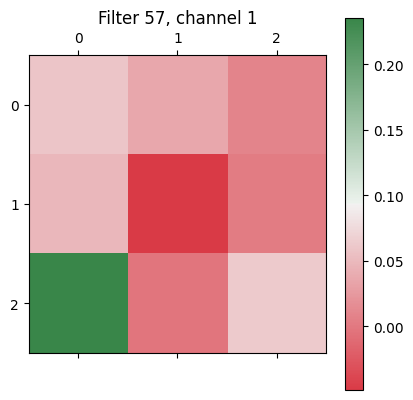

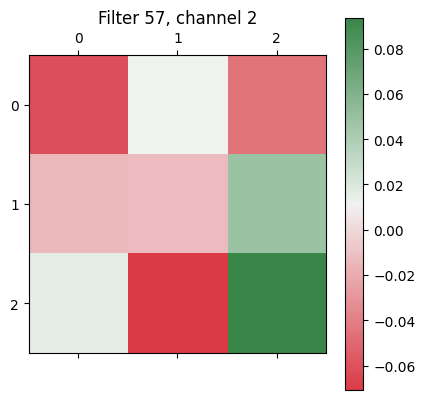

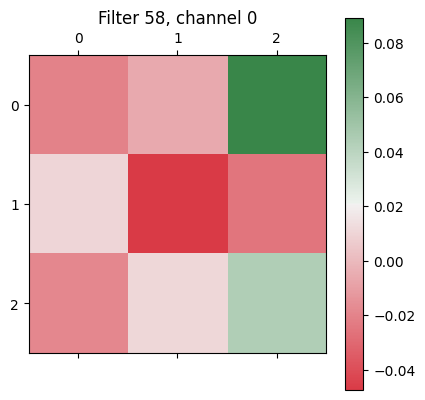

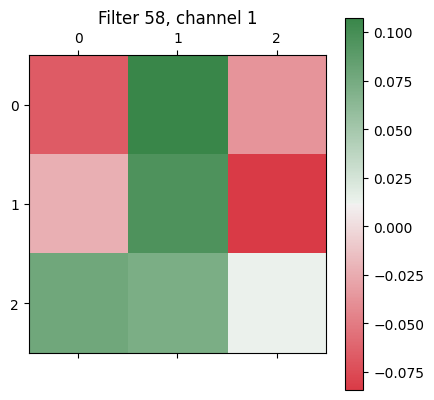

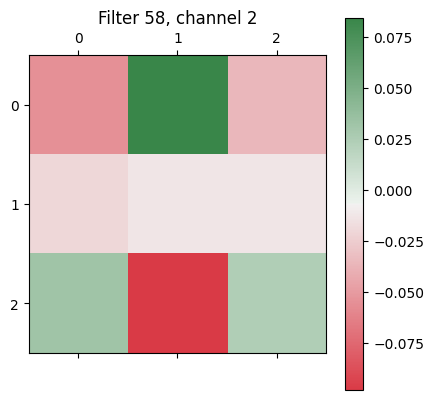

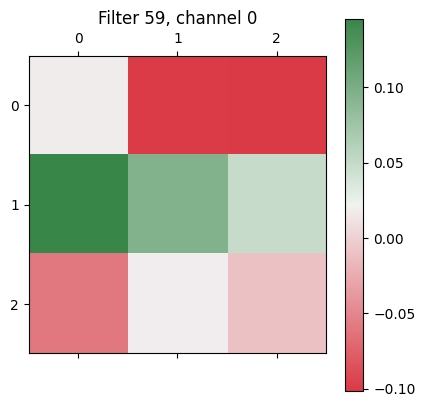

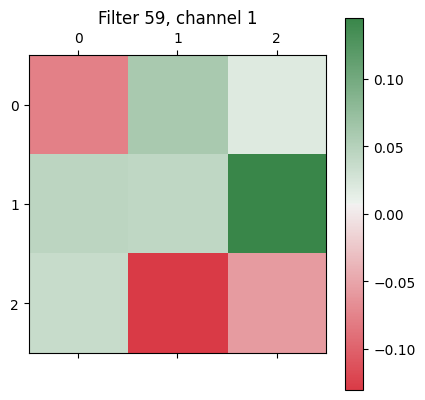

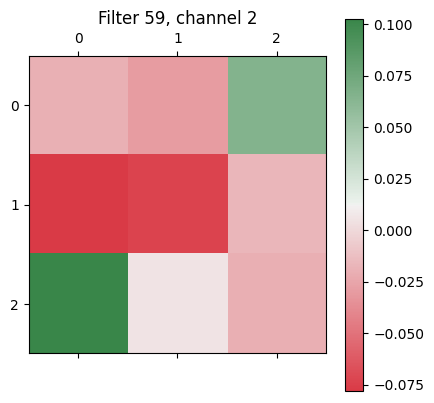

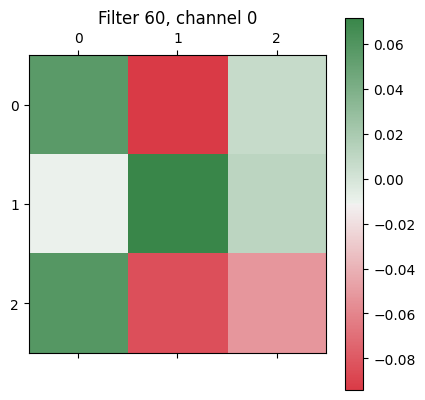

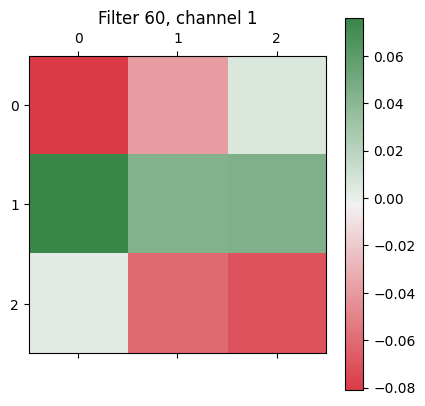

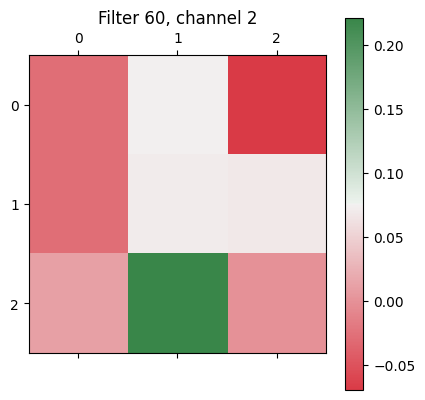

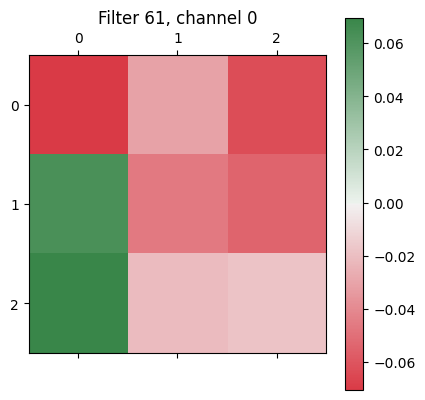

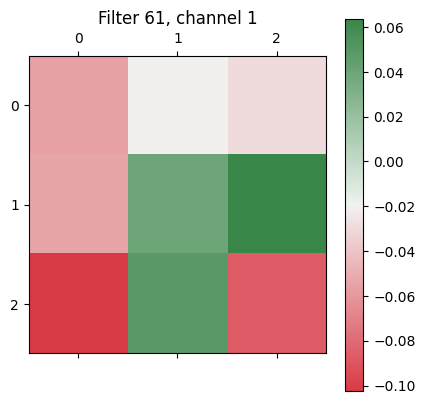

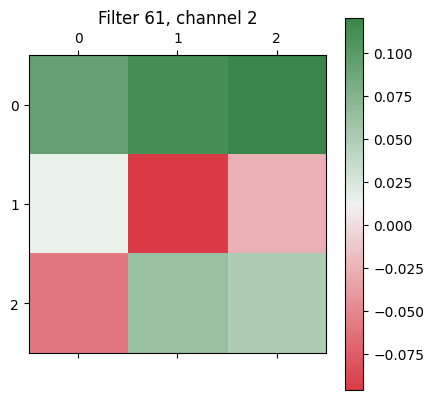

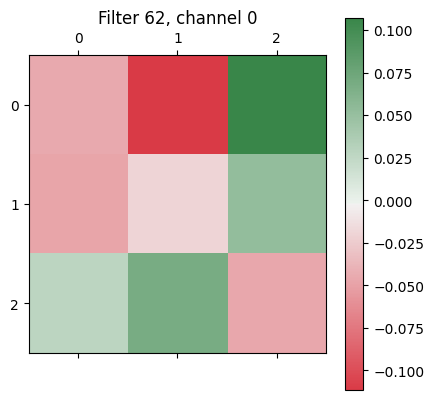

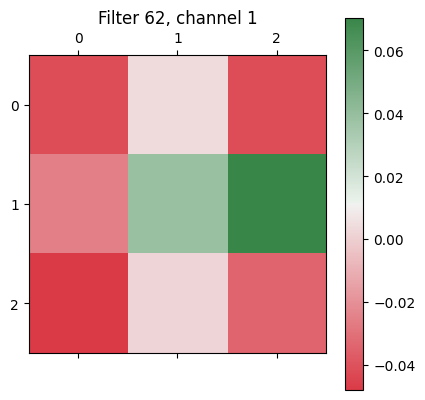

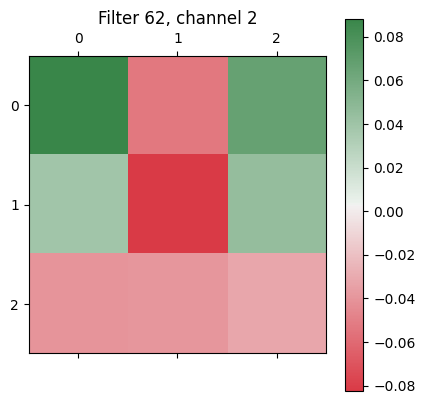

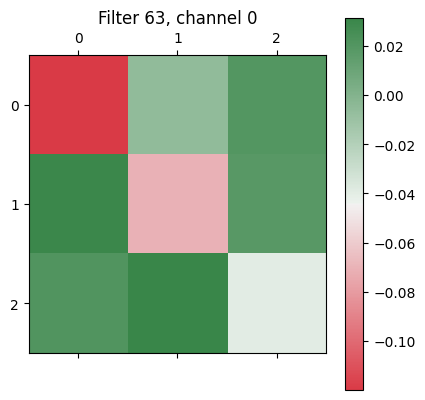

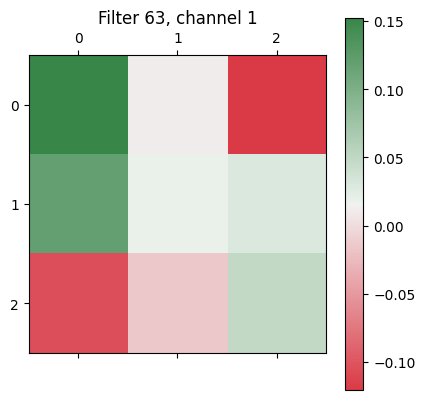

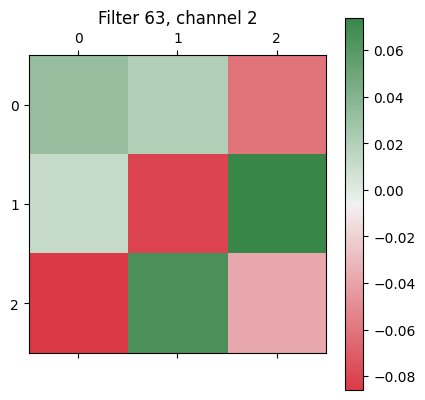

In [24]:
import seaborn as sns

# Conv visualization
CONV1 = model_SD['embedder.block1.conv.weight']
CMAP = sns.diverging_palette(10, 133, as_cmap=True)
for filt in range(CONV1.shape[0]):
    for channel in range(CONV1.shape[-1]):
        plt.matshow(CONV1[filt,:,:,channel], cmap=CMAP)
        plt.title(f'Filter {filt}, channel {channel}')
        plt.colorbar()
        plt.show()